<a href="https://colab.research.google.com/github/SharatGupta/DSML-Projects/blob/main/Learning%20In%20progress/Health_Domain_OR_Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Libraries and Dataset

In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [308]:
!gdown 1Y599SQf0EwCRJu9gsvY8Jw_z2BoymVBt

Downloading...
From: https://drive.google.com/uc?id=1Y599SQf0EwCRJu9gsvY8Jw_z2BoymVBt
To: /content/Operating_room_utilization_dataset.csv
100% 343k/343k [00:00<00:00, 11.2MB/s]


Data Description
* Date --> The date of the surgery.
* OR Suite --> The operating room where the surgery will take place.
* Service --> The surgical specialty.
* CPT Code --> The code for the surgical procedure.
* CPT Description --> A description of the surgical procedure.
* Booked Time (min) --> The amount of time that was booked for the surgery.
* OR Schedule --> The time that the surgery was scheduled to start.
* Wheels In --> The time that the patient arrived in the operating room.
* Start Time --> The time that the surgery started.
* End Time --> The time that the surgery ended.
* Wheels Out --> The time that the patient left the operating room.



In [309]:
data = pd.read_csv("Operating_room_utilization_dataset.csv")

In [310]:
data.shape

(2172, 13)

In [311]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              2172 non-null   int64 
 1   Encounter ID       2172 non-null   int64 
 2   Date               2172 non-null   object
 3   OR Suite           2172 non-null   int64 
 4   Service            2172 non-null   object
 5   CPT Code           2172 non-null   int64 
 6   CPT Description    2172 non-null   object
 7   Booked Time (min)  2172 non-null   int64 
 8   OR Schedule        2172 non-null   object
 9   Wheels In          2172 non-null   object
 10  Start Time         2172 non-null   object
 11  End Time           2172 non-null   object
 12  Wheels Out         2172 non-null   object
dtypes: int64(5), object(8)
memory usage: 220.7+ KB


In [312]:
data.duplicated().sum(axis=0)

0

In [313]:
data.isna().sum()

index                0
Encounter ID         0
Date                 0
OR Suite             0
Service              0
CPT Code             0
CPT Description      0
Booked Time (min)    0
OR Schedule          0
Wheels In            0
Start Time           0
End Time             0
Wheels Out           0
dtype: int64

In [314]:
data.head()

,index,Encounter ID,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,End Time,Wheels Out
0,0,10001,01/03/22,1,Podiatry,28110,"Partial ostectomy, fifth metatarsal head",90,01/03/22 07:00 AM,01/03/22 07:05 AM,01/03/22 07:32 AM,01/03/22 09:05 AM,01/03/22 09:17 AM
1,1,10002,01/03/22,1,Podiatry,28055,"Neurectomy, intrinsic musculature of foot",60,01/03/22 08:45 AM,01/03/22 09:48 AM,01/03/22 10:13 AM,01/03/22 11:01 AM,01/03/22 11:12 AM
2,2,10003,01/03/22,1,Podiatry,28297,Lapidus bunionectomy,150,01/03/22 10:00 AM,01/03/22 11:50 AM,01/03/22 12:20 PM,01/03/22 12:42 PM,01/03/22 12:58 PM
3,3,10004,01/03/22,1,Podiatry,28296,Bunionectomy with distal osteotomy,120,01/03/22 12:45 PM,01/03/22 01:29 PM,01/03/22 01:53 PM,01/03/22 02:50 PM,01/03/22 03:02 PM
4,4,10005,01/03/22,2,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",120,01/03/22 07:00 AM,01/03/22 07:15 AM,01/03/22 07:50 AM,01/03/22 09:38 AM,01/03/22 09:51 AM


# Feature Engineering

In [315]:
data.drop("index", axis=1,inplace = True)

In [316]:
for x in ['Date','OR Schedule', 'Wheels In', 'Start Time', 'End Time', 'Wheels Out']:
  data[x] = pd.to_datetime(data[x])

<ipython-input-316-03ca9e9622da>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[x] = pd.to_datetime(data[x])
<ipython-input-316-03ca9e9622da>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[x] = pd.to_datetime(data[x])
<ipython-input-316-03ca9e9622da>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[x] = pd.to_datetime(data[x])
<ipython-input-316-03ca9e9622da>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[x] = 

In [317]:
data.describe()

,Encounter ID,Date,OR Suite,CPT Code,Booked Time (min),OR Schedule,Wheels In,Start Time,End Time,Wheels Out
count,2172.000000,2172,2172.000000,2172.000000,2172.000000,2172,2172,2172,2172,2172
mean,11086.500000,2022-02-16 00:09:16.906077440,4.288674,44881.405617,77.189227,2022-02-16 09:48:15.580110336,2022-02-16 10:23:48.149171200,2022-02-16 10:45:19.944751616,2022-02-16 11:30:48.453038848,2022-02-16 11:43:29.972375808
min,10001.000000,2022-01-03 00:00:00,1.000000,14060.000000,30.000000,2022-01-03 07:00:00,2022-01-03 07:03:00,2022-01-03 07:13:00,2022-01-03 07:31:00,2022-01-03 07:38:00
25%,10543.750000,2022-01-25 00:00:00,3.000000,28296.000000,60.000000,2022-01-25 11:15:00,2022-01-25 12:33:45,2022-01-25 12:57:15,2022-01-25 13:35:15,2022-01-25 13:48:15
50%,11086.500000,2022-02-16 00:00:00,4.000000,42826.000000,60.000000,2022-02-16 08:15:00,2022-02-16 08:37:30,2022-02-16 09:00:00,2022-02-16 09:30:30,2022-02-16 09:44:00
75%,11629.250000,2022-03-10 00:00:00,6.000000,66982.000000,90.000000,2022-03-10 09:30:00,2022-03-10 10:30:15,2022-03-10 10:54:00,2022-03-10 11:40:00,2022-03-10 11:55:00
max,12172.000000,2022-03-31 00:00:00,8.000000,69436.000000,180.000000,2022-03-31 14:00:00,2022-03-31 14:30:00,2022-03-31 14:50:00,2022-03-31 15:50:00,2022-03-31 16:02:00
std,627.146713,NaN,2.163514,18087.419079,30.430015,NaN,NaN,NaN,NaN,NaN


In [318]:
data["Week#"] = data["OR Schedule"].dt.strftime("%U")

In [319]:
data["Week#"].value_counts()

Week#
10    185
06    178
11    177
09    176
01    174
05    174
04    173
07    172
12    172
02    169
13    143
08    142
03    137
Name: count, dtype: int64

In [320]:
data["Dayofweek"] = data["OR Schedule"].dt.strftime("%A")

In [321]:
data["Dayofweek"].value_counts()

Dayofweek
Tuesday      456
Wednesday    455
Thursday     451
Friday       422
Monday       388
Name: count, dtype: int64

* So OR rooms are used only on WeekDays

In [322]:
data["BookingHr"] = data["OR Schedule"].dt.strftime("%H")

In [323]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'BookingHr'],
      dtype='object')

In [324]:
data["ORSchedule_Wheelsin"] = (data["Wheels In"] - data["OR Schedule"])/np.timedelta64(1,"m")
data["Wheelsin_Start"] = (data["Start Time"]-data["Wheels In"])/np.timedelta64(1,"m")
data["Start_End"] = (data["End Time"]-data["Start Time"])/np.timedelta64(1,"m")
data["End_Wheelsout"] = (data["Wheels Out"]-data["End Time"])/np.timedelta64(1,"m")
data["Wheelsin_Wheelsout"] = (data["Wheels Out"]-data["Wheels In"])/np.timedelta64(1,"m")
data["ORSchedule_Wheelsout"] = (data["Wheels Out"] - data["OR Schedule"])/np.timedelta64(1,"m")

In [325]:
data["ORSchedule_Wheelsin Ratio"] = data["ORSchedule_Wheelsin"]/data["Booked Time (min)"]
data["Wheelsin_Start Ratio"] = data["Wheelsin_Start"]/data["Booked Time (min)"]
data["Start_End Ratio"] = data["Start_End"]/data["Booked Time (min)"]
data["End_Wheelsout Ratio"] = data["End_Wheelsout"]/data["Booked Time (min)"]
data["ORSchedule_Wheelsout Ratio"] = data["ORSchedule_Wheelsout"]/data["Booked Time (min)"]

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2172 entries, 0 to 2171
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Encounter ID                2172 non-null   int64         
 1   Date                        2172 non-null   datetime64[ns]
 2   OR Suite                    2172 non-null   int64         
 3   Service                     2172 non-null   object        
 4   CPT Code                    2172 non-null   int64         
 5   CPT Description             2172 non-null   object        
 6   Booked Time (min)           2172 non-null   int64         
 7   OR Schedule                 2172 non-null   datetime64[ns]
 8   Wheels In                   2172 non-null   datetime64[ns]
 9   Start Time                  2172 non-null   datetime64[ns]
 10  End Time                    2172 non-null   datetime64[ns]
 11  Wheels Out                  2172 non-null   datetime64[n

In [327]:
data.tail()

,Encounter ID,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,...,Wheelsin_Start,Start_End,End_Wheelsout,Wheelsin_Wheelsout,ORSchedule_Wheelsout,ORSchedule_Wheelsin Ratio,Wheelsin_Start Ratio,Start_End Ratio,End_Wheelsout Ratio,ORSchedule_Wheelsout Ratio
2167,12168,2022-03-31,7,Pediatrics,69421,"Myringotomy, general anesthesia",60,2022-03-31 10:45:00,2022-03-31 11:59:00,2022-03-31 12:11:00,...,12.0,28.0,12.0,52.0,126.0,1.233333,0.200000,0.466667,0.200000,2.100000
2168,12169,2022-03-31,7,Pediatrics,69421,"Myringotomy, general anesthesia",60,2022-03-31 12:00:00,2022-03-31 13:20:00,2022-03-31 13:47:00,...,27.0,27.0,14.0,68.0,148.0,1.333333,0.450000,0.450000,0.233333,2.466667
2169,12170,2022-03-31,8,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",120,2022-03-31 07:00:00,2022-03-31 07:06:00,2022-03-31 07:45:00,...,39.0,81.0,12.0,132.0,138.0,0.050000,0.325000,0.675000,0.100000,1.150000
2170,12171,2022-03-31,8,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",120,2022-03-31 09:15:00,2022-03-31 09:40:00,2022-03-31 10:15:00,...,35.0,85.0,21.0,141.0,166.0,0.208333,0.291667,0.708333,0.175000,1.383333
2171,12172,2022-03-31,8,Orthopedics,27130,"Arthroplasty, hip",120,2022-03-31 11:30:00,2022-03-31 12:40:00,2022-03-31 13:12:00,...,32.0,88.0,18.0,138.0,208.0,0.583333,0.266667,0.733333,0.150000,1.733333


# Univariate & Bivariate Analysis

In [178]:
for x in data.columns:
  #print("Values count of feature ",x)
  print( x,":", data[x].nunique())

Encounter ID : 2172
Date : 62
OR Suite : 8
Service : 10
CPT Code : 32
CPT Description : 32
Booked Time (min) : 8
OR Schedule : 981
Wheels In : 1982
Start Time : 2000
End Time : 2047
Wheels Out : 2100
Week# : 13
Dayofweek : 5
BookingHr : 9
ORSchedule_Wheelsin : 61
Wheelsin_Start : 24
Start_End : 52
End_Wheelsout : 17
Wheelsin_Wheelsout : 56
ORSchedule_Wheelsout : 76
ORSchedule_Wheelsin Ratio : 67
Wheelsin_Start Ratio : 36
Start_End Ratio : 46
End_Wheelsout Ratio : 31
ORSchedule_Wheelsout Ratio : 84


### Date

In [179]:
data.Date.describe()

count                             2172
mean     2022-02-16 00:09:16.906077440
min                2022-01-03 00:00:00
25%                2022-01-25 00:00:00
50%                2022-02-16 00:00:00
75%                2022-03-10 00:00:00
max                2022-03-31 00:00:00
Name: Date, dtype: object

In [180]:
data.Date.nunique()

62

In [181]:
# Average no o fof OR bookings per Day
data.groupby("Date")["Encounter ID"].count().mean()

35.03225806451613

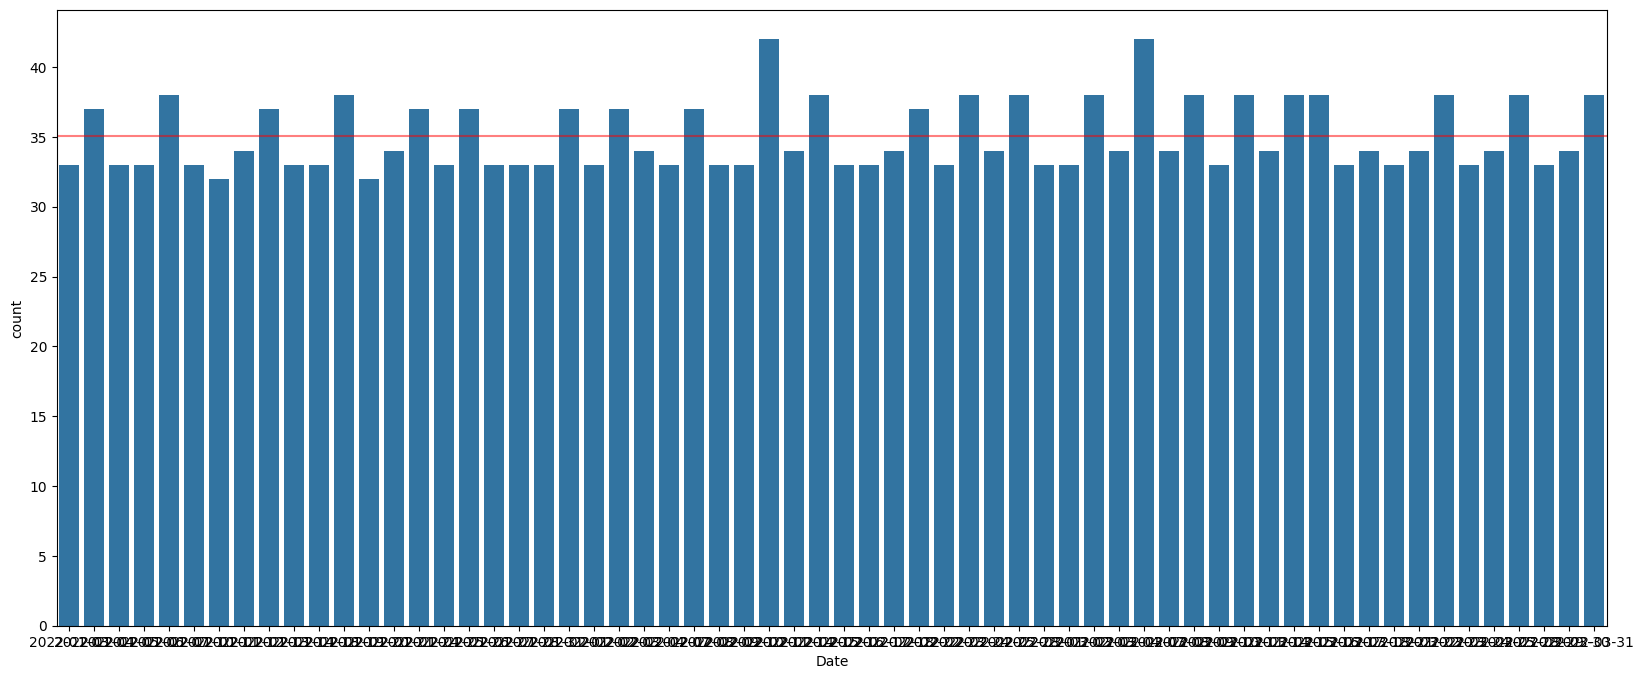

In [182]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(data=data, x = "Date")
ax.axhline(data.groupby("Date")["Encounter ID"].count().mean(), color='red', alpha = 0.5)

### Service

In [183]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'BookingHr', 'ORSchedule_Wheelsin', 'Wheelsin_Start', 'Start_End',
       'End_Wheelsout', 'Wheelsin_Wheelsout', 'ORSchedule_Wheelsout',
       'ORSchedule_Wheelsin Ratio', 'Wheelsin_Start Ratio', 'Start_End Ratio',
       'End_Wheelsout Ratio', 'ORSchedule_Wheelsout Ratio'],
      dtype='object')

In [184]:
data["Service"].nunique()

10

In [185]:
data["Service"].value_counts()

Service
Ophthalmology    334
Orthopedics      321
Podiatry         246
Pediatrics       220
Plastic          207
ENT              197
Urology          193
Vascular         173
OBGYN            164
General          117
Name: count, dtype: int64

In [186]:
# Average booking time for Each Service
data.groupby("Service")["Booked Time (min)"].mean()

Service
ENT               67.005076
General          110.000000
OBGYN             97.500000
Ophthalmology     44.640719
Orthopedics       87.383178
Pediatrics        60.000000
Plastic          110.434783
Podiatry          89.512195
Urology           66.062176
Vascular          68.236994
Name: Booked Time (min), dtype: float64

In [187]:
data.groupby("Service").agg({"Booked Time (min)": ["mean", "min", "max"]}).reset_index()

Service Booked Time (min)         
                              mean min  max
0            ENT         67.005076  60   90
1        General        110.000000  90  120
2          OBGYN         97.500000  75  120
3  Ophthalmology         44.640719  30   45
4    Orthopedics         87.383178  60  120
5     Pediatrics         60.000000  60   60
6        Plastic        110.434783  60  180
7       Podiatry         89.512195  60  150
8        Urology         66.062176  60   90
9       Vascular         68.236994  60   75

### OR Suite

In [188]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'BookingHr', 'ORSchedule_Wheelsin', 'Wheelsin_Start', 'Start_End',
       'End_Wheelsout', 'Wheelsin_Wheelsout', 'ORSchedule_Wheelsout',
       'ORSchedule_Wheelsin Ratio', 'Wheelsin_Start Ratio', 'Start_End Ratio',
       'End_Wheelsout Ratio', 'ORSchedule_Wheelsout Ratio'],
      dtype='object')

In [189]:
data["OR Suite"].nunique()

8

In [190]:
data["OR Suite"].value_counts()

OR Suite
3    439
7    288
5    286
4    268
2    252
1    246
6    207
8    186
Name: count, dtype: int64

In [191]:
pd.crosstab(data["Service"], data["OR Suite"])

OR Suite,1,2,3,4,5,6,7,8
Service,,,,,,,,
ENT,0,0,0,0,197,0,0,0
General,0,0,0,0,0,0,0,117
OBGYN,0,0,0,164,0,0,0,0
Ophthalmology,0,0,334,0,0,0,0,0
Orthopedics,0,252,0,0,0,0,0,69
Pediatrics,0,0,105,0,0,0,115,0
Plastic,0,0,0,0,0,207,0,0
Podiatry,246,0,0,0,0,0,0,0
Urology,0,0,0,104,89,0,0,0


### CPT Code & CPT Description

In [192]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'BookingHr', 'ORSchedule_Wheelsin', 'Wheelsin_Start', 'Start_End',
       'End_Wheelsout', 'Wheelsin_Wheelsout', 'ORSchedule_Wheelsout',
       'ORSchedule_Wheelsin Ratio', 'Wheelsin_Start Ratio', 'Start_End Ratio',
       'End_Wheelsout Ratio', 'ORSchedule_Wheelsout Ratio'],
      dtype='object')

In [193]:
data["CPT Code"].nunique()

32

In [194]:
data["CPT Code"].value_counts()

CPT Code
66982    334
42826    151
69436    132
29877    112
36901     95
69421     88
14060     86
28296     85
27445     82
58562     82
57460     82
43775     78
28820     78
55250     78
52353     76
17110     69
30520     46
28060     42
64721     42
28285     42
55873     39
47562     39
15773     36
28289     23
27130     23
26045     21
26735     21
26356     20
28055     18
28297     18
28110     18
30400     16
Name: count, dtype: int64

In [195]:
data.groupby(["Service"])["CPT Code"].nunique().reset_index()

,Service,CPT Code
0,ENT,2
1,General,2
2,OBGYN,2
3,Ophthalmology,1
4,Orthopedics,7
5,Pediatrics,2
6,Plastic,4
7,Podiatry,7
8,Urology,3
9,Vascular,2


In [196]:
data.groupby(["Service","CPT Code","CPT Description"])["Encounter ID"].count().reset_index().sort_values(by = "Encounter ID",ascending = False).head(5)

,Service,CPT Code,CPT Description,Encounter ID
6,Ophthalmology,66982,Extracapsular cataract removal,334
1,ENT,42826,Tonsillectomy,151
15,Pediatrics,69436,"Tympanostomy, general anesthesia",132
12,Orthopedics,29877,"Arthroscopy, knee, surgical",112
31,Vascular,36901,AV fistula,95


In [197]:
data.groupby(["Service","CPT Code","CPT Description"])["Encounter ID"].count().reset_index().sort_values(by = "Encounter ID",ascending = True).head(5)

,Service,CPT Code,CPT Description,Encounter ID
19,Plastic,30400,Rhinoplasty,16
26,Podiatry,28297,Lapidus bunionectomy,18
22,Podiatry,28110,"Partial ostectomy, fifth metatarsal head",18
20,Podiatry,28055,"Neurectomy, intrinsic musculature of foot",18
8,Orthopedics,26356,Flexor tendon repair,20


In [198]:
A= data.groupby(["Service","CPT Code","CPT Description"]).agg({"Booked Time (min)": ["mean", "min", "max"]}).reset_index()
A.columns = A.columns.map('|'.join).str.strip('|')
A

,Service,CPT Code,CPT Description,Booked Time (min)|mean,Booked Time (min)|min,Booked Time (min)|max
0,ENT,30520,Septoplasty,90.000000,90,90
1,ENT,42826,Tonsillectomy,60.000000,60,60
2,General,43775,Sleeve gastrectomy,120.000000,120,120
3,General,47562,Laparoscopic cholecystectomy,90.000000,90,90
4,OBGYN,57460,Cervical biopsy,75.000000,75,75
5,OBGYN,58562,"Hysterectomy, surgical",120.000000,120,120
6,Ophthalmology,66982,Extracapsular cataract removal,44.640719,30,45
7,Orthopedics,26045,"Fasciotomy, palmar, open",90.000000,90,90
8,Orthopedics,26356,Flexor tendon repair,90.000000,90,90
9,Orthopedics,26735,"ORIF, phalangeal shaft fracture",120.000000,120,120


In [199]:
A= data.groupby(["Service","CPT Code","CPT Description"]).agg({"Booked Time (min)": "mean","Wheelsin_Wheelsout":"mean"}).reset_index()
A["Delay"] = A["Wheelsin_Wheelsout"] - A["Booked Time (min)"]
A.sort_values(by ="Delay",ascending = False, inplace = True)
A.head(10)

,Service,CPT Code,CPT Description,Booked Time (min),Wheelsin_Wheelsout,Delay
22,Podiatry,28110,"Partial ostectomy, fifth metatarsal head",90.0,132.000000,42.000000
20,Podiatry,28055,"Neurectomy, intrinsic musculature of foot",60.0,84.000000,24.000000
23,Podiatry,28285,"Correction, hammertoe",60.0,83.500000,23.500000
11,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",120.0,143.085366,23.085366
10,Orthopedics,27130,"Arthroplasty, hip",120.0,138.000000,18.000000
31,Vascular,36901,AV fistula,75.0,92.315789,17.315789
24,Podiatry,28289,Hallux rigidus correction with cheilectomy,60.0,77.000000,17.000000
29,Urology,55873,Cryosurgery of the prostate gland,90.0,104.000000,14.000000
12,Orthopedics,29877,"Arthroscopy, knee, surgical",60.0,73.473214,13.473214
21,Podiatry,28060,Plantar fasciotomy,60.0,71.500000,11.500000


### Week#

In [200]:
data["Week#"].nunique()

13

In [201]:
 A = data.groupby("Week#").aggregate({"Date":"nunique","Encounter ID": "count"}).reset_index()
 A

,Week#,Date,Encounter ID
0,01,5,174
1,02,5,169
2,03,4,137
3,04,5,173
4,05,5,174
5,06,5,178
6,07,5,172
7,08,4,142
8,09,5,176
9,10,5,185


In [202]:
#Finding Avg EncounterID per Week
A["Encounter ID"].mean()

167.07692307692307

<Axes: xlabel='Week#', ylabel='count'>

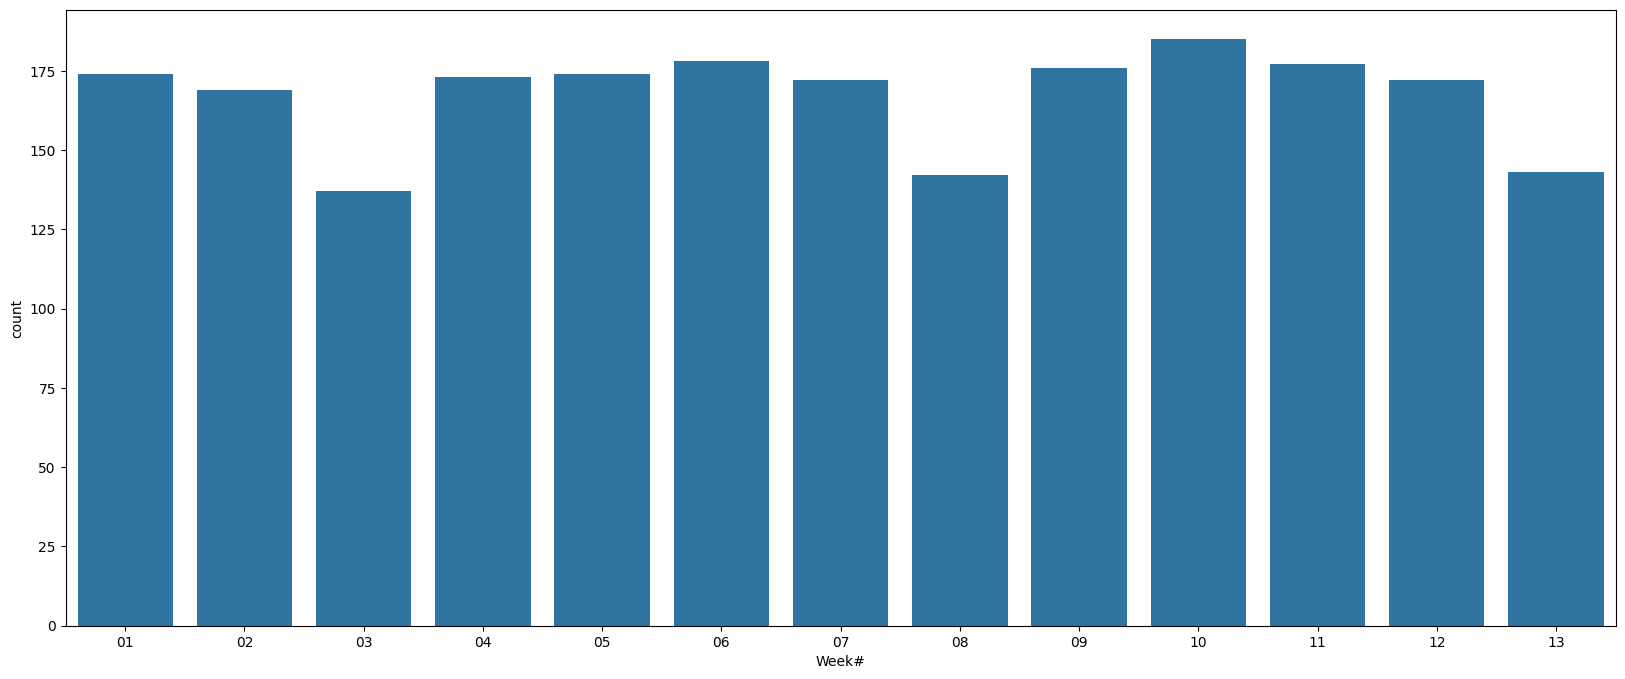

In [203]:
fig, ax = plt.subplots(figsize=(20,8))
sns.countplot(data=data, x= "Week#")

### BookingHr


In [204]:
data["BookingHr"].nunique()

9

In [205]:
 A = data.groupby("BookingHr").aggregate({"Encounter ID": "count"}).reset_index()
 A

,BookingHr,Encounter ID
0,07,497
1,08,313
2,09,398
3,10,314
4,11,287
5,12,178
6,13,142
7,14,41
8,15,2


<Axes: xlabel='BookingHr', ylabel='count'>

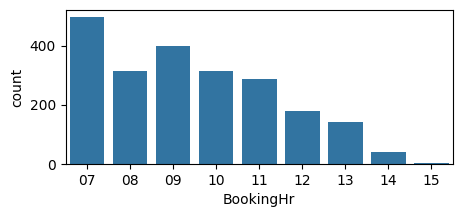

In [206]:
fig, ax = plt.subplots(figsize=(5,2))
sns.countplot(data= data,x="BookingHr",order = A["BookingHr"] )

<Axes: xlabel='BookingHr'>

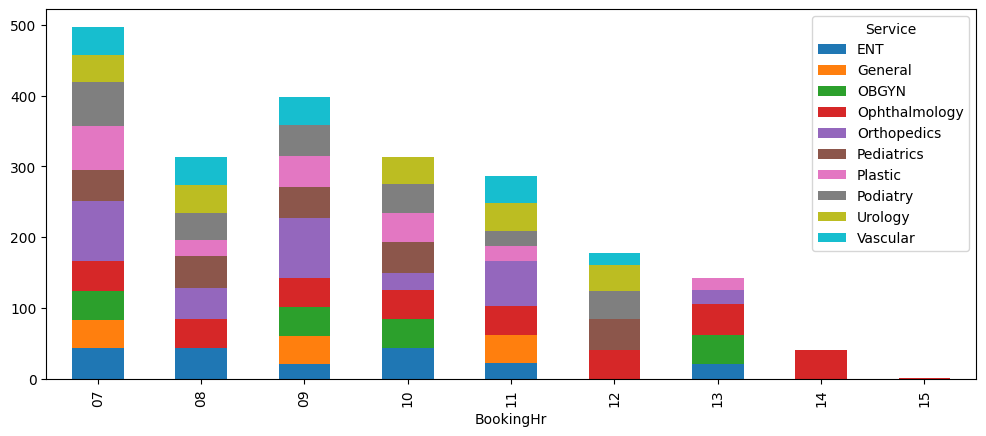

In [207]:
fig, ax = plt.subplots(figsize=(12,4.8))
A= data.groupby(["BookingHr","Service"])["Encounter ID"].count().reset_index()
A =A.pivot(index='BookingHr', columns='Service', values="Encounter ID")
A.plot(kind ="bar",stacked = True, ax= ax)

### Dayofweek


In [208]:
data["Dayofweek"].nunique()

5

In [209]:
 A = data.groupby("Dayofweek").aggregate({"Encounter ID": "count"}).reset_index()
 A

,Dayofweek,Encounter ID
0,Friday,422
1,Monday,388
2,Thursday,451
3,Tuesday,456
4,Wednesday,455


<Axes: xlabel='Dayofweek', ylabel='count'>

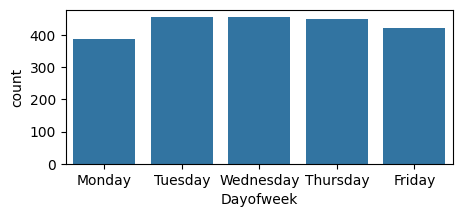

In [210]:
fig, ax = plt.subplots(figsize=(5,2))
sns.countplot(data= data,x="Dayofweek")

<Axes: xlabel='Dayofweek'>

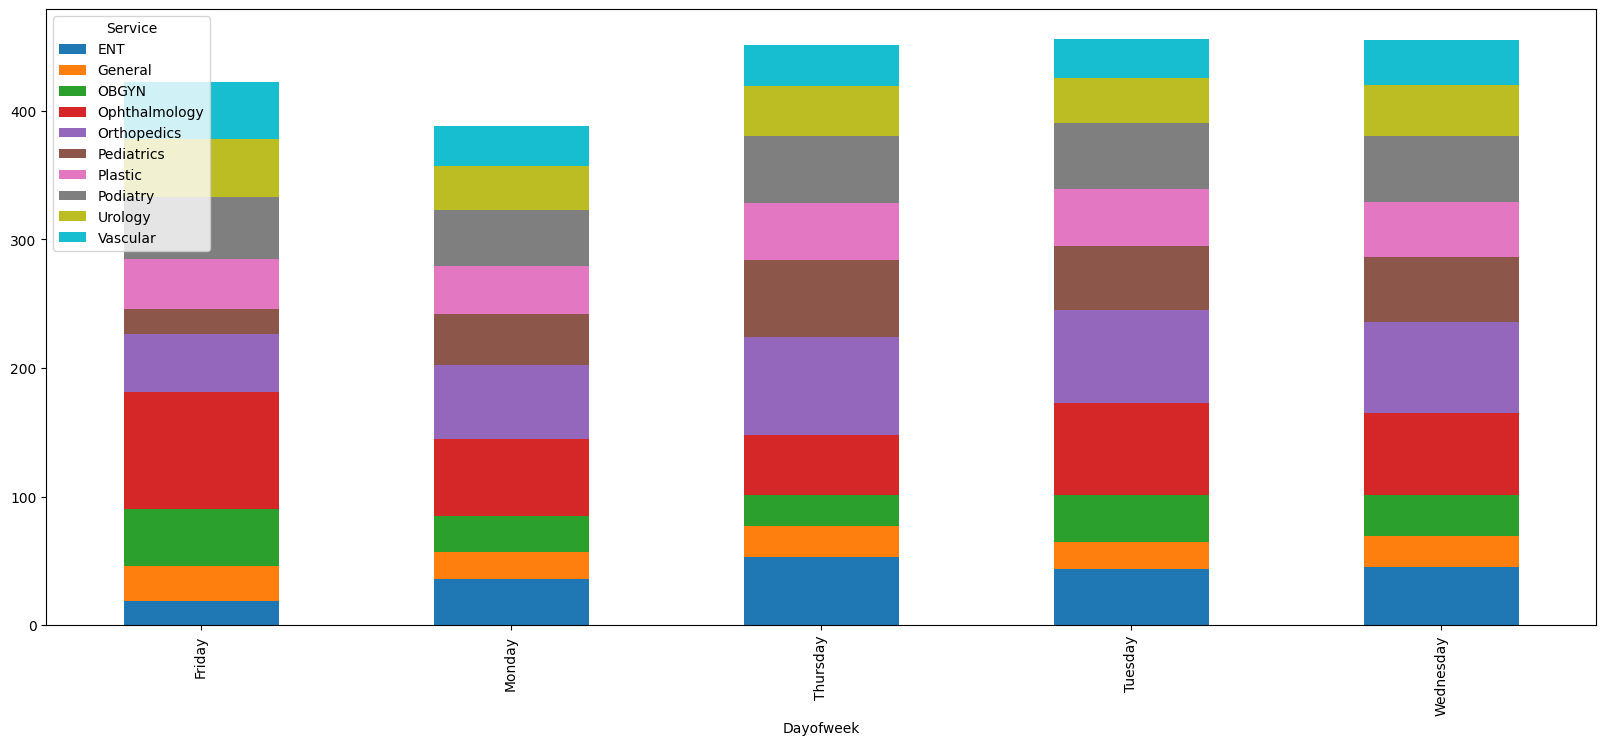

In [211]:
fig, ax = plt.subplots(figsize=(20,8))
A= data.groupby(["Dayofweek","Service"])["Encounter ID"].count().reset_index()
A =A.pivot(index='Dayofweek', columns='Service', values="Encounter ID")
A.plot(kind ="bar",stacked = True, ax= ax)

### Booked Time (min)

In [212]:
data["Booked Time (min)"].nunique()

8

In [213]:
data["Booked Time (min)"].value_counts()

Booked Time (min)
60     951
120    473
45     326
90     183
75     177
180     36
150     18
30       8
Name: count, dtype: int64

<Axes: xlabel='Booked Time (min)', ylabel='count'>

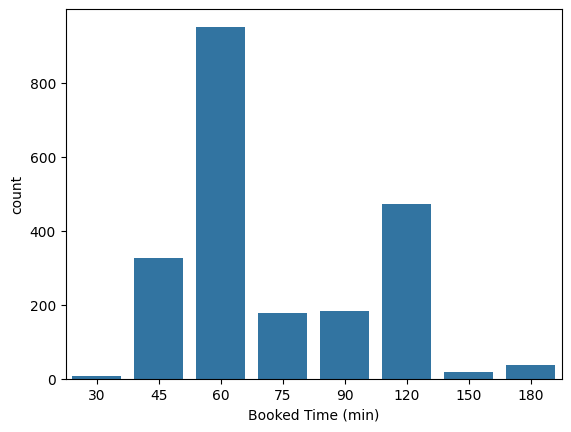

In [214]:
sns.countplot(data =data, x= "Booked Time (min)")

In [215]:
pd.crosstab(data["Service"], data["Booked Time (min)"])

Booked Time (min),30,45,60,75,90,120,150,180
Service,,,,,,,,
ENT,0,0,151,0,46,0,0,0
General,0,0,0,0,39,78,0,0
OBGYN,0,0,0,82,0,82,0,0
Ophthalmology,8,326,0,0,0,0,0,0
Orthopedics,0,0,154,0,41,126,0,0
Pediatrics,0,0,220,0,0,0,0,0
Plastic,0,0,69,0,0,102,0,36
Podiatry,0,0,125,0,18,85,18,0
Urology,0,0,154,0,39,0,0,0


In [216]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'BookingHr', 'ORSchedule_Wheelsin', 'Wheelsin_Start', 'Start_End',
       'End_Wheelsout', 'Wheelsin_Wheelsout', 'ORSchedule_Wheelsout',
       'ORSchedule_Wheelsin Ratio', 'Wheelsin_Start Ratio', 'Start_End Ratio',
       'End_Wheelsout Ratio', 'ORSchedule_Wheelsout Ratio'],
      dtype='object')

### Wheelsin_Wheelsout [Actual Usage]

In [217]:
data["Wheelsin_Wheelsout"].describe()

count    2172.000000
mean       79.697053
std        31.822390
min        19.000000
25%        62.000000
50%        73.000000
75%        96.000000
max       173.000000
Name: Wheelsin_Wheelsout, dtype: float64

<Axes: xlabel='Wheelsin_Wheelsout', ylabel='Count'>

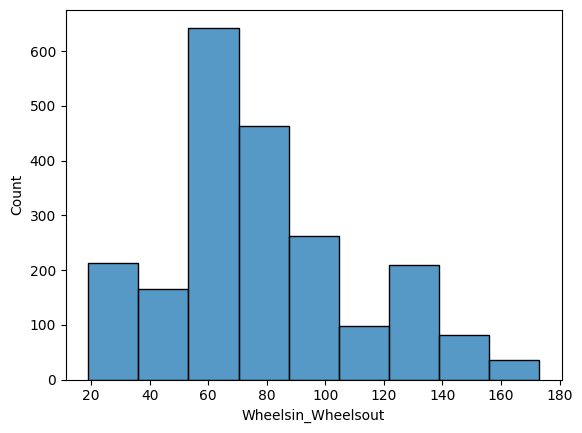

In [218]:
sns.histplot(data["Wheelsin_Wheelsout"], bins = 9)

### ORSchedule_Wheelsin

In [219]:
data["ORSchedule_Wheelsin Ratio"].mean()

0.48301642111724985

#### Service

In [220]:
data.groupby("Service")["ORSchedule_Wheelsin Ratio"].mean().reset_index()

,Service,ORSchedule_Wheelsin Ratio
0,ENT,0.469430
1,General,0.336111
2,OBGYN,0.248333
3,Ophthalmology,-0.093114
4,Orthopedics,0.813828
5,Pediatrics,0.770000
6,Plastic,0.171337
7,Podiatry,0.585908
8,Urology,0.901900
9,Vascular,0.713160


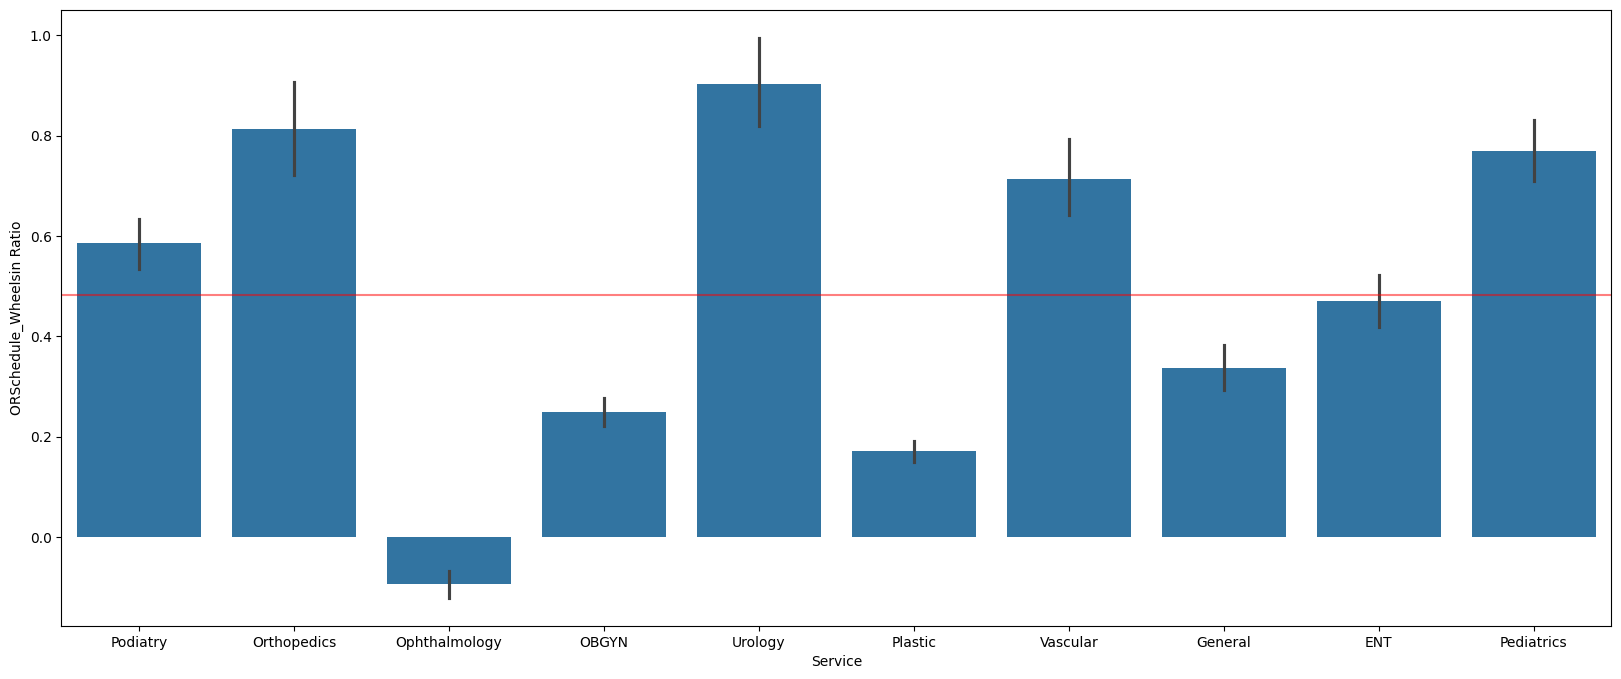

In [221]:
# Service wise ORSchedule_Wheelsin Ratio
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="Service",y = "ORSchedule_Wheelsin Ratio", estimator=np.mean)
# drawing average line
ax.axhline(data["ORSchedule_Wheelsin Ratio"].mean(), color='red', alpha = 0.5)

#### CPT Description

In [222]:
data.groupby("CPT Description")["ORSchedule_Wheelsin Ratio"].mean().reset_index()

,CPT Description,ORSchedule_Wheelsin Ratio
0,AV fistula,1.095018
1,"Adjacent tissue transfer, eyelids, nose, ears,...",0.136047
2,"Arthroplasty, hip",0.583333
3,"Arthroplasty, knee, hinge prothesis",0.227947
4,"Arthroscopy, knee, surgical",1.490923
5,Bunionectomy with distal osteotomy,0.467843
6,"Carpal tunnel release, open",0.266667
7,Cervical biopsy,0.346667
8,"Correction, hammertoe",1.000000
9,Cryosurgery of the prostate gland,0.266667


In [223]:
data.groupby(["Service","CPT Description"])["ORSchedule_Wheelsin Ratio"].mean().reset_index().sort_values(by ="ORSchedule_Wheelsin Ratio",ascending = True).head(10)

,Service,CPT Description,ORSchedule_Wheelsin Ratio
6,Ophthalmology,Extracapsular cataract removal,-0.093114
25,Podiatry,"Partial ostectomy, fifth metatarsal head",0.055556
17,Plastic,Liposuction,0.097222
19,Plastic,Rhinoplasty,0.116667
16,Plastic,"Adjacent tissue transfer, eyelids, nose, ears,...",0.136047
5,OBGYN,"Hysterectomy, surgical",0.150000
3,General,Sleeve gastrectomy,0.170833
0,ENT,Septoplasty,0.194444
8,Orthopedics,"Arthroplasty, knee, hinge prothesis",0.227947
31,Vascular,"Digital amputation, metatarsophalangeal joint",0.248077


In [224]:
data.groupby(["Service","CPT Description"])["ORSchedule_Wheelsin Ratio"].mean().reset_index().sort_values(by ="ORSchedule_Wheelsin Ratio",ascending = False).head(10)

,Service,CPT Description,ORSchedule_Wheelsin Ratio
9,Orthopedics,"Arthroscopy, knee, surgical",1.490923
28,Urology,Cystourethroscopy,1.361404
14,Pediatrics,"Myringotomy, general anesthesia",1.283333
12,Orthopedics,Flexor tendon repair,1.144444
30,Vascular,AV fistula,1.095018
24,Podiatry,"Neurectomy, intrinsic musculature of foot",1.050000
21,Podiatry,"Correction, hammertoe",1.000000
29,Urology,Vasectomy,0.771795
23,Podiatry,Lapidus bunionectomy,0.733333
13,Orthopedics,"ORIF, phalangeal shaft fracture",0.691667


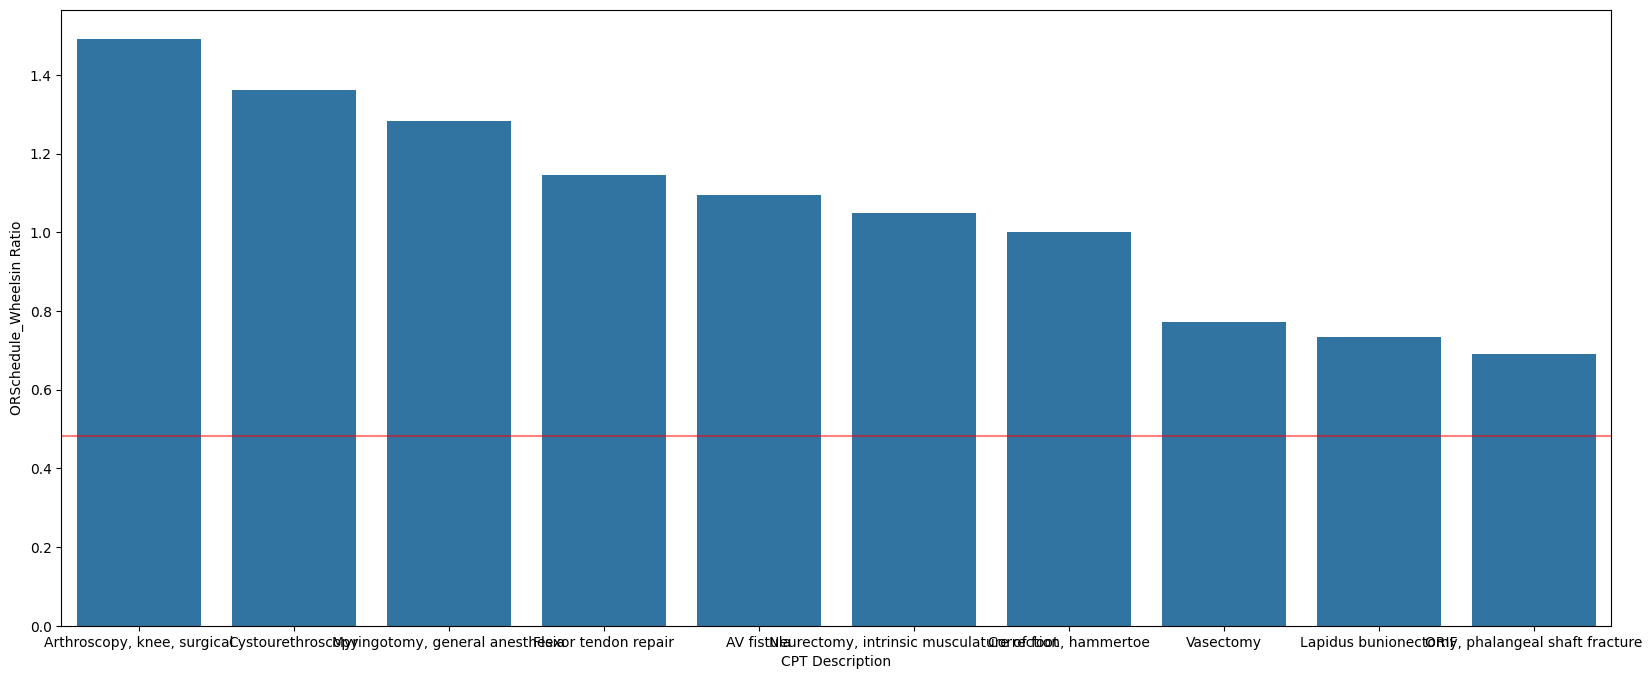

In [225]:
# CPT Description wise ORSchedule_Wheelsin Ratio
A = data.groupby("CPT Description")["ORSchedule_Wheelsin Ratio"].mean().reset_index().sort_values(by ="ORSchedule_Wheelsin Ratio",ascending = False).head(10)
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="CPT Description",y = "ORSchedule_Wheelsin Ratio")
# drawing average line
ax.axhline(data["ORSchedule_Wheelsin Ratio"].mean(), color='red', alpha = 0.5)

#### OR Suites

In [226]:
data.groupby("OR Suite")["ORSchedule_Wheelsin Ratio"].mean().reset_index()

,OR Suite,ORSchedule_Wheelsin Ratio
0,1,0.585908
1,2,0.959843
2,3,0.113326
3,4,0.492761
4,5,0.612626
5,6,0.171337
6,7,0.735856
7,8,0.315502


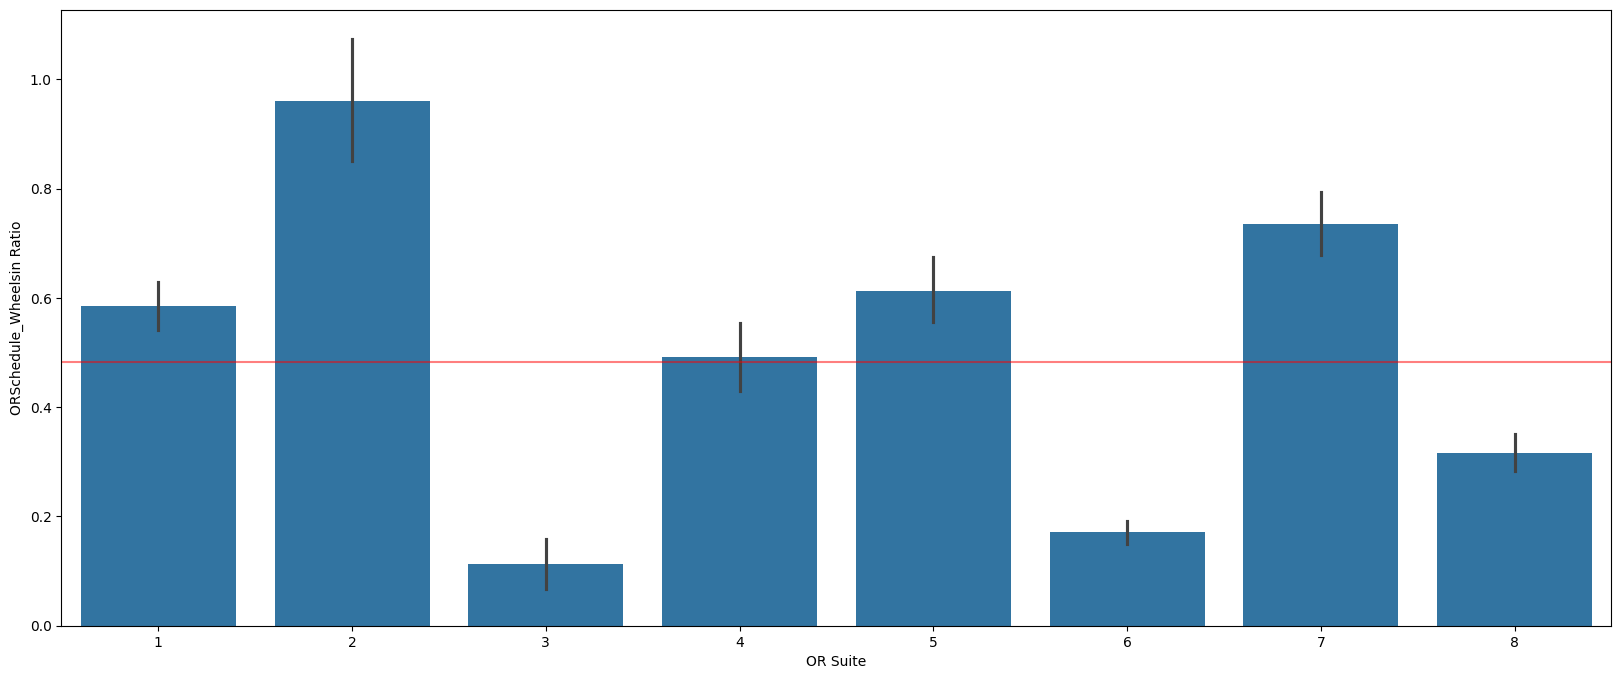

In [227]:
# OR Suite wise ORSchedule_Wheelsin Ratio
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="OR Suite",y = "ORSchedule_Wheelsin Ratio", estimator=np.mean)
# drawing average line
ax.axhline(data["ORSchedule_Wheelsin Ratio"].mean(), color='red', alpha = 0.5)

#### Week

In [228]:
data.groupby("Week#")["ORSchedule_Wheelsin Ratio"].mean().reset_index()

,Week#,ORSchedule_Wheelsin Ratio
0,01,0.456577
1,02,0.508886
2,03,0.462502
3,04,0.494756
4,05,0.496845
5,06,0.469825
6,07,0.492674
7,08,0.486984
8,09,0.509823
9,10,0.444387


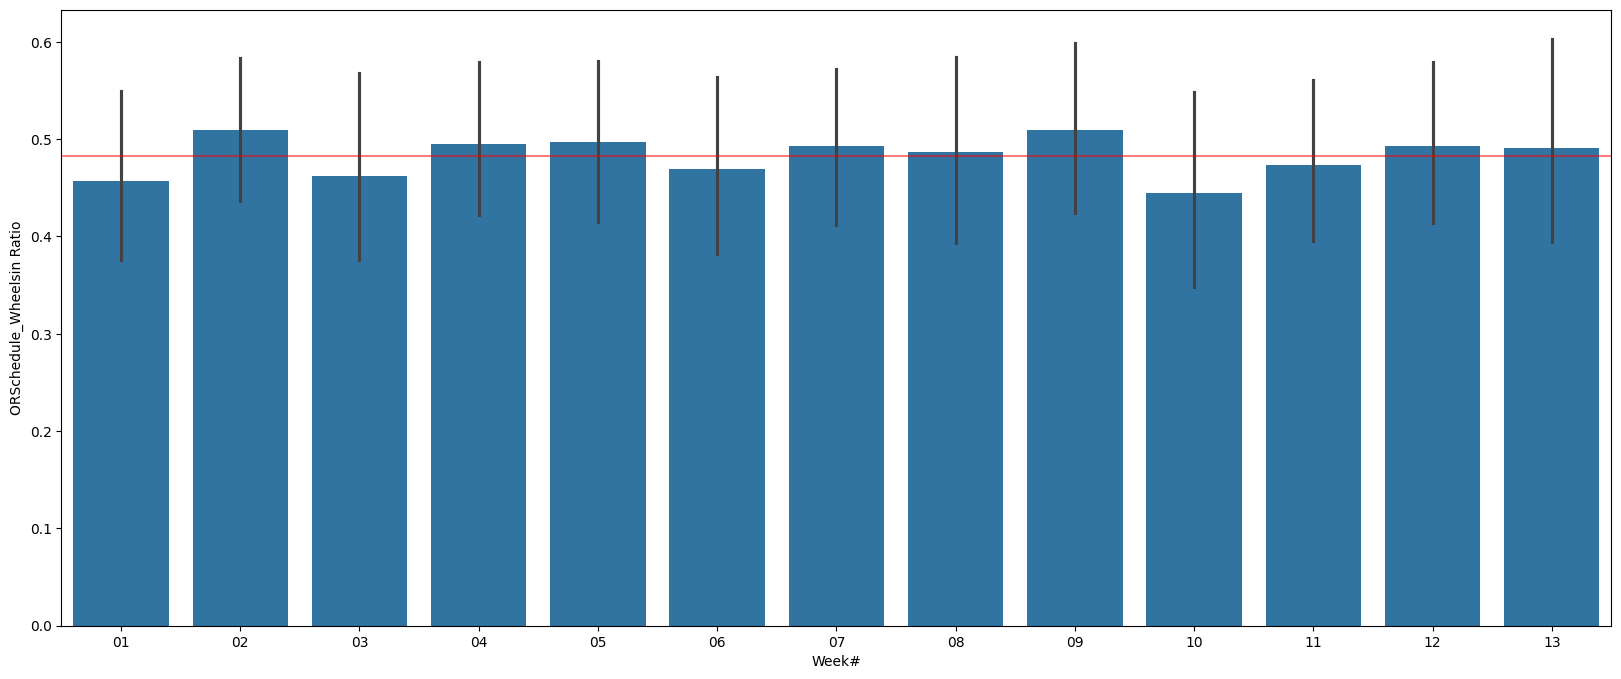

In [229]:
# Service wise ORSchedule_Wheelsin Ratio
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="Week#",y = "ORSchedule_Wheelsin Ratio", estimator=np.mean)
# drawing average line
ax.axhline(data["ORSchedule_Wheelsin Ratio"].mean(), color='red', alpha = 0.5)

### Wheelsin_Start

In [230]:
data["Wheelsin_Start Ratio"].mean()

0.29888121546961327

#### Service

In [231]:
data.groupby("Service")["Wheelsin_Start Ratio"].mean().reset_index()

,Service,Wheelsin_Start Ratio
0,ENT,0.351043
1,General,0.181481
2,OBGYN,0.256250
3,Ophthalmology,0.241550
4,Orthopedics,0.340005
5,Pediatrics,0.373333
6,Plastic,0.224316
7,Podiatry,0.307520
8,Urology,0.329016
9,Vascular,0.342312


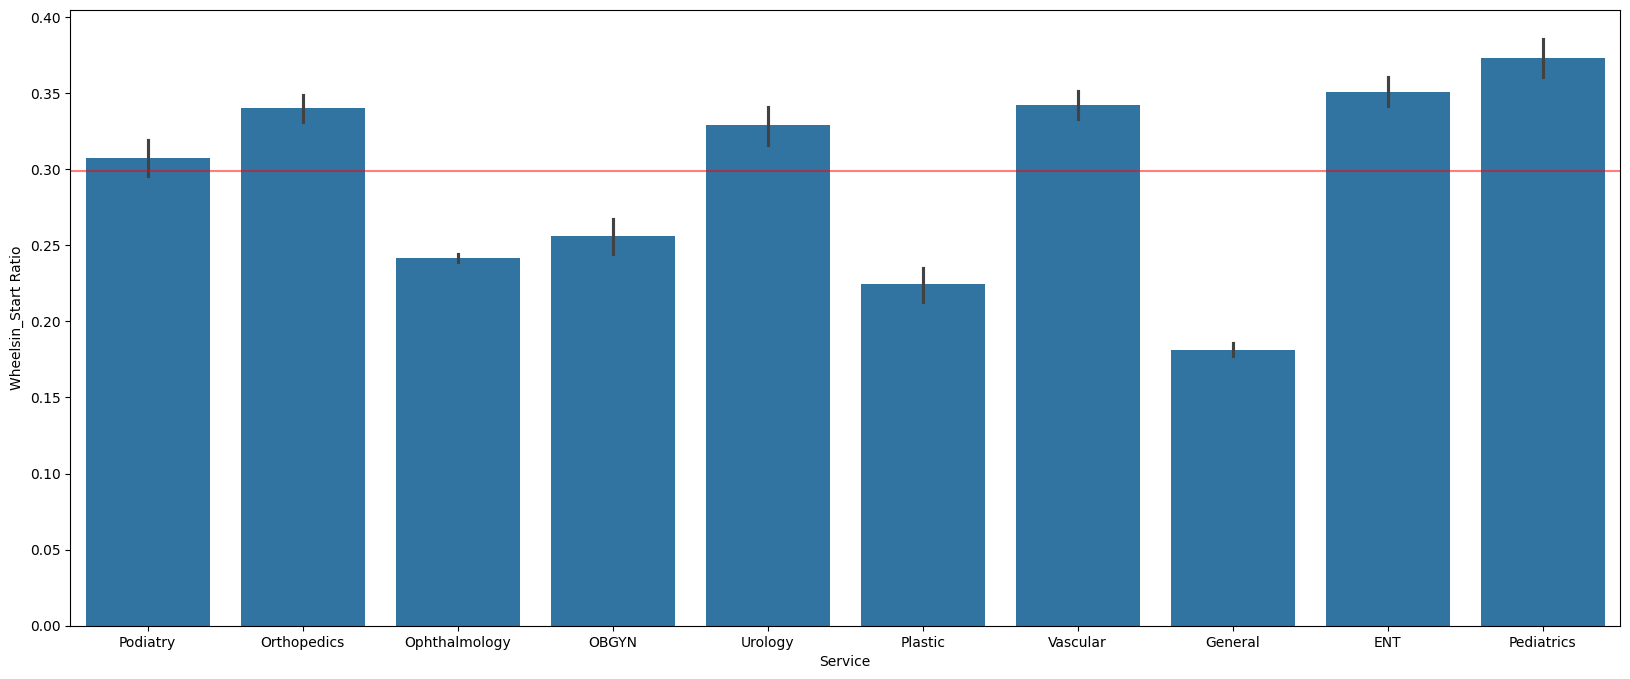

In [232]:
# Service wise Wheelsin_Start Ratio
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="Service",y = "Wheelsin_Start Ratio", estimator=np.mean)
# drawing average line
ax.axhline(data["Wheelsin_Start Ratio"].mean(), color='red', alpha = 0.5)

#### CPT Description

In [233]:
data.groupby("CPT Description")["Wheelsin_Start Ratio"].mean().reset_index()

,CPT Description,Wheelsin_Start Ratio
0,AV fistula,0.327579
1,"Adjacent tissue transfer, eyelids, nose, ears,...",0.187791
2,"Arthroplasty, hip",0.266667
3,"Arthroplasty, knee, hinge prothesis",0.307114
4,"Arthroscopy, knee, surgical",0.422321
5,Bunionectomy with distal osteotomy,0.196078
6,"Carpal tunnel release, open",0.375000
7,Cervical biopsy,0.333333
8,"Correction, hammertoe",0.375000
9,Cryosurgery of the prostate gland,0.255556


In [234]:
data.groupby(["Service","CPT Description"])["Wheelsin_Start Ratio"].mean().reset_index().sort_values(by ="Wheelsin_Start Ratio",ascending = True).head(10)

,Service,CPT Description,Wheelsin_Start Ratio
17,Plastic,Liposuction,0.116667
3,General,Sleeve gastrectomy,0.166667
5,OBGYN,"Hysterectomy, surgical",0.179167
16,Plastic,"Adjacent tissue transfer, eyelids, nose, ears,...",0.187791
20,Podiatry,Bunionectomy with distal osteotomy,0.196078
23,Podiatry,Lapidus bunionectomy,0.200000
2,General,Laparoscopic cholecystectomy,0.211111
13,Orthopedics,"ORIF, phalangeal shaft fracture",0.214683
19,Plastic,Rhinoplasty,0.216667
12,Orthopedics,Flexor tendon repair,0.233333


In [235]:
data.groupby(["Service","CPT Description"])["Wheelsin_Start Ratio"].mean().reset_index().sort_values(by ="Wheelsin_Start Ratio",ascending = False).head(10)

,Service,CPT Description,Wheelsin_Start Ratio
9,Orthopedics,"Arthroscopy, knee, surgical",0.422321
22,Podiatry,Hallux rigidus correction with cheilectomy,0.416667
24,Podiatry,"Neurectomy, intrinsic musculature of foot",0.416667
26,Podiatry,Plantar fasciotomy,0.408333
15,Pediatrics,"Tympanostomy, general anesthesia",0.405556
1,ENT,Tonsillectomy,0.385210
28,Urology,Cystourethroscopy,0.380044
21,Podiatry,"Correction, hammertoe",0.375000
10,Orthopedics,"Carpal tunnel release, open",0.375000
31,Vascular,"Digital amputation, metatarsophalangeal joint",0.360256


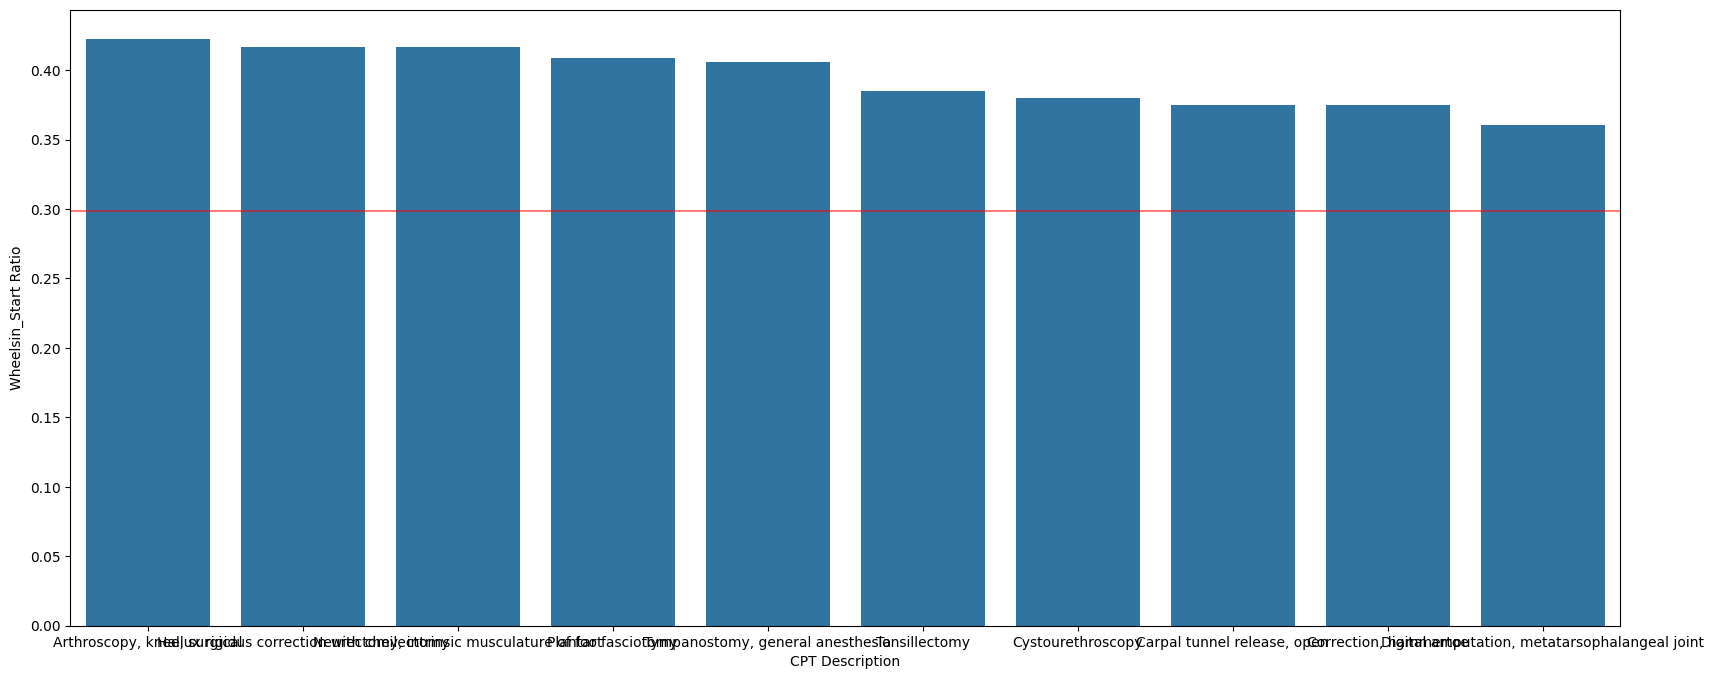

In [236]:
# CPT Description wise Wheelsin_Start Ratio
A = data.groupby("CPT Description")["Wheelsin_Start Ratio"].mean().reset_index().sort_values(by ="Wheelsin_Start Ratio",ascending = False).head(10)
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="CPT Description",y = "Wheelsin_Start Ratio")
# drawing average line
ax.axhline(data["Wheelsin_Start Ratio"].mean(), color='red', alpha = 0.5)

#### OR Suites

In [237]:
data.groupby("OR Suite")["Wheelsin_Start Ratio"].mean().reset_index()

,OR Suite,Wheelsin_Start Ratio
0,1,0.307520
1,2,0.352480
2,3,0.273070
3,4,0.283862
4,5,0.344775
5,6,0.224316
6,7,0.354699
7,8,0.223387


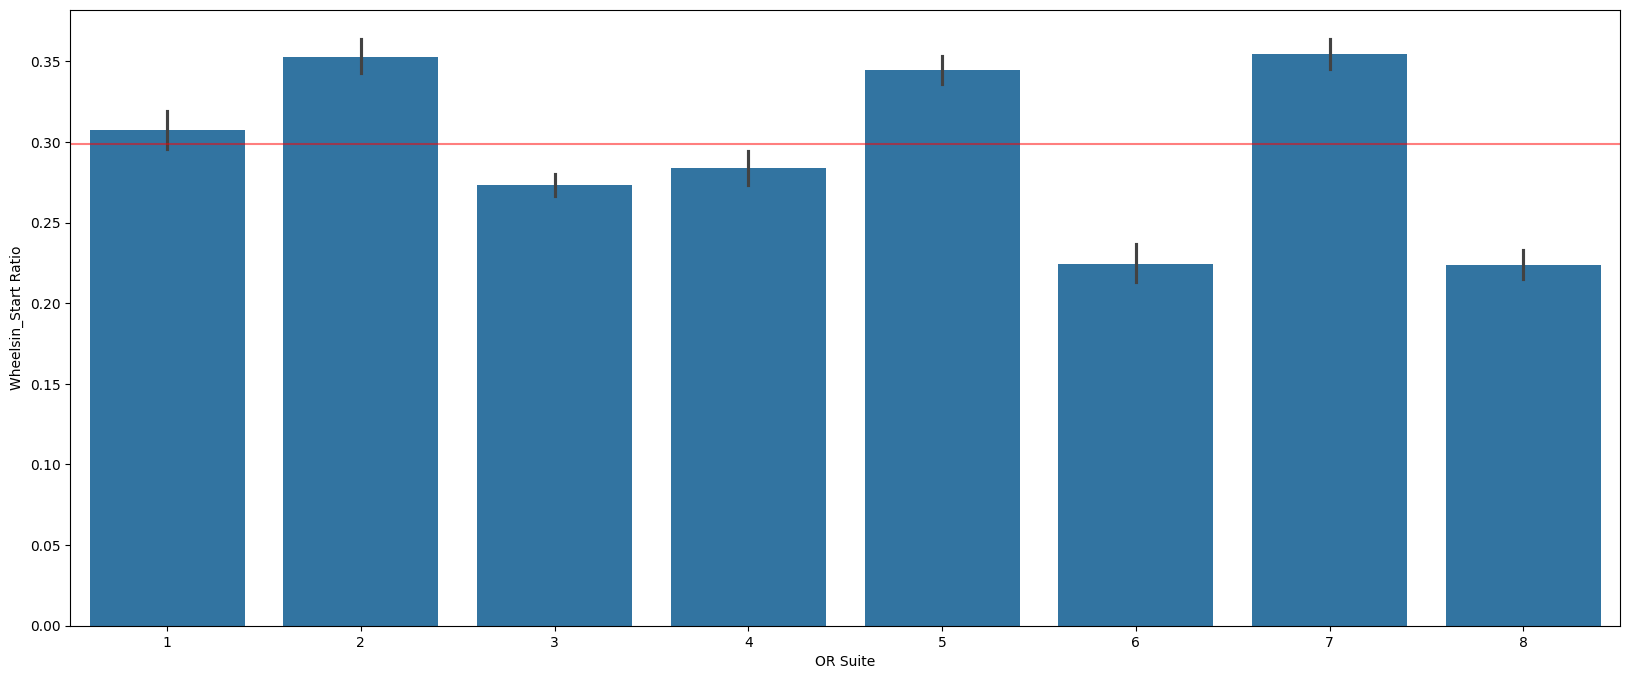

In [238]:
# OR Suite wise Wheelsin_Start Ratio
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="OR Suite",y = "Wheelsin_Start Ratio", estimator=np.mean)
# drawing average line
ax.axhline(data["Wheelsin_Start Ratio"].mean(), color='red', alpha = 0.5)

#### Week

In [239]:
data.groupby("Week#")["Wheelsin_Start Ratio"].mean().reset_index()

,Week#,Wheelsin_Start Ratio
0,01,0.292803
1,02,0.308199
2,03,0.289388
3,04,0.304772
4,05,0.304505
5,06,0.300190
6,07,0.295481
7,08,0.298877
8,09,0.303980
9,10,0.296931


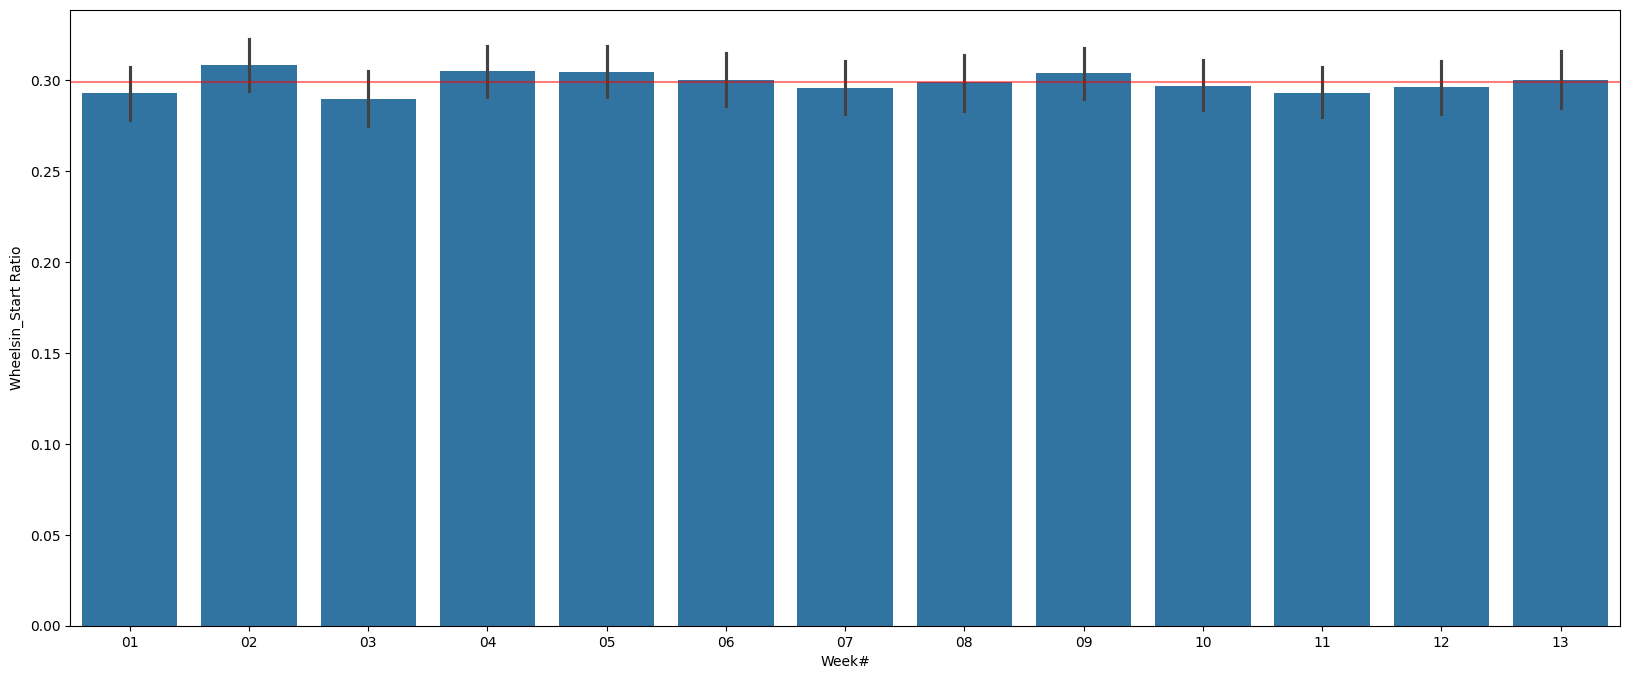

In [240]:
# Service wise Wheelsin_Start Ratio
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="Week#",y = "Wheelsin_Start Ratio", estimator=np.mean)
# drawing average line
ax.axhline(data["Wheelsin_Start Ratio"].mean(), color='red', alpha = 0.5)

### Start_End

In [241]:
data["Start_End Ratio"].mean()

0.5582450890116636

#### Service

In [242]:
data.groupby("Service")["Start_End Ratio"].mean().reset_index()

,Service,Start_End Ratio
0,ENT,0.497631
1,General,0.711111
2,OBGYN,0.544167
3,Ophthalmology,0.365935
4,Orthopedics,0.642714
5,Pediatrics,0.503333
6,Plastic,0.606965
7,Podiatry,0.660393
8,Urology,0.534888
9,Vascular,0.644123


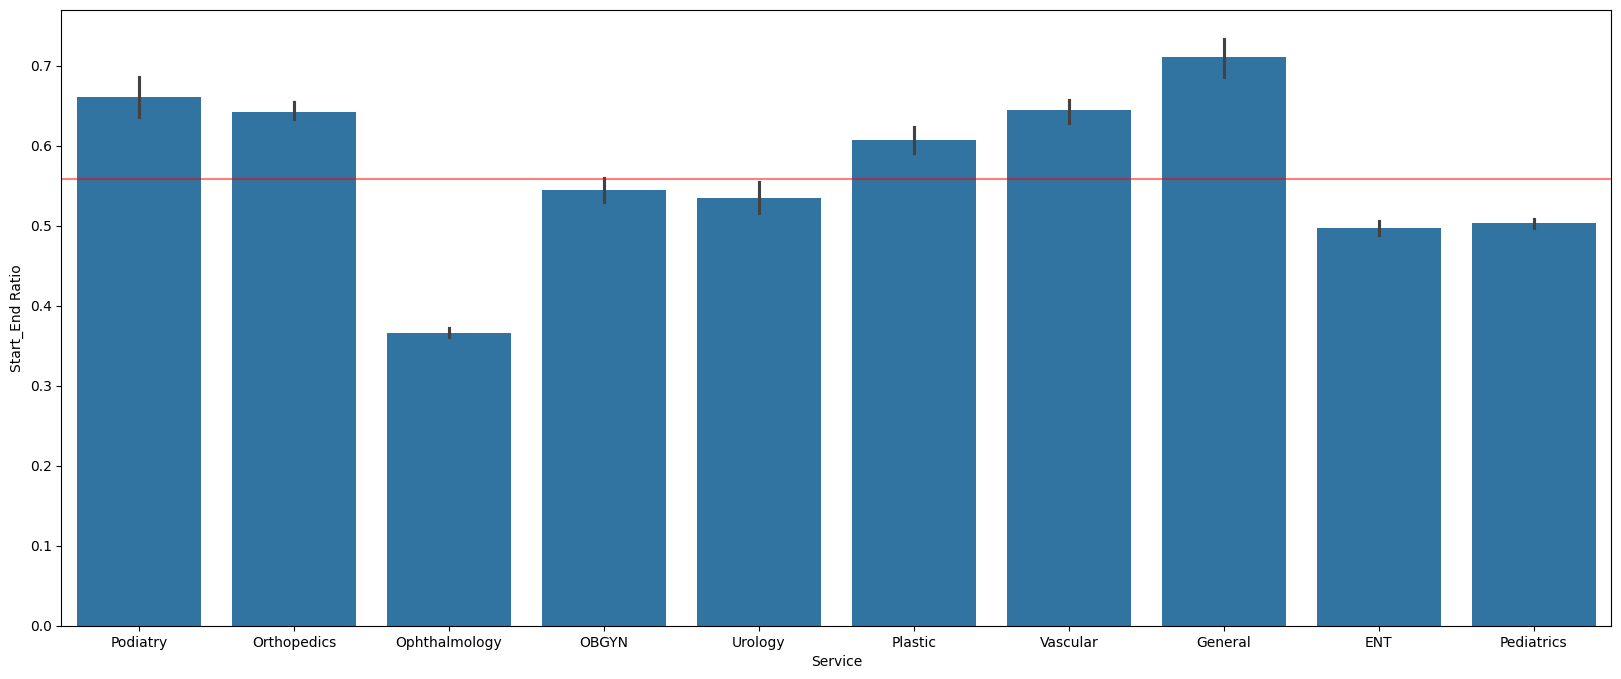

In [243]:
# Service wise Start_End Ratio
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="Service",y = "Start_End Ratio", estimator=np.mean)
# drawing average line
ax.axhline(data["Start_End Ratio"].mean(), color='red', alpha = 0.5)

#### CPT Description

In [244]:
data.groupby("CPT Description")["Start_End Ratio"].mean().reset_index()

,CPT Description,Start_End Ratio
0,AV fistula,0.721404
1,"Adjacent tissue transfer, eyelids, nose, ears,...",0.628779
2,"Arthroplasty, hip",0.733333
3,"Arthroplasty, knee, hinge prothesis",0.751423
4,"Arthroscopy, knee, surgical",0.578274
5,Bunionectomy with distal osteotomy,0.647843
6,"Carpal tunnel release, open",0.591667
7,Cervical biopsy,0.446667
8,"Correction, hammertoe",0.750000
9,Cryosurgery of the prostate gland,0.733333


In [245]:
data.groupby(["Service","CPT Description"])["Start_End Ratio"].mean().reset_index().sort_values(by ="Start_End Ratio",ascending = True).head(10)

,Service,CPT Description,Start_End Ratio
23,Podiatry,Lapidus bunionectomy,0.146667
6,Ophthalmology,Extracapsular cataract removal,0.365935
28,Urology,Cystourethroscopy,0.399781
4,OBGYN,Cervical biopsy,0.446667
14,Pediatrics,"Myringotomy, general anesthesia",0.458333
1,ENT,Tonsillectomy,0.471523
12,Orthopedics,Flexor tendon repair,0.522222
15,Pediatrics,"Tympanostomy, general anesthesia",0.533333
2,General,Laparoscopic cholecystectomy,0.533333
18,Plastic,Removal of benign skin lesion,0.544444


In [246]:
data.groupby(["Service","CPT Description"])["Start_End Ratio"].mean().reset_index().sort_values(by ="Start_End Ratio",ascending = False).head(10)

,Service,CPT Description,Start_End Ratio
25,Podiatry,"Partial ostectomy, fifth metatarsal head",1.033333
3,General,Sleeve gastrectomy,0.800000
24,Podiatry,"Neurectomy, intrinsic musculature of foot",0.800000
8,Orthopedics,"Arthroplasty, knee, hinge prothesis",0.751423
21,Podiatry,"Correction, hammertoe",0.750000
7,Orthopedics,"Arthroplasty, hip",0.733333
27,Urology,Cryosurgery of the prostate gland,0.733333
30,Vascular,AV fistula,0.721404
13,Orthopedics,"ORIF, phalangeal shaft fracture",0.700000
22,Podiatry,Hallux rigidus correction with cheilectomy,0.700000


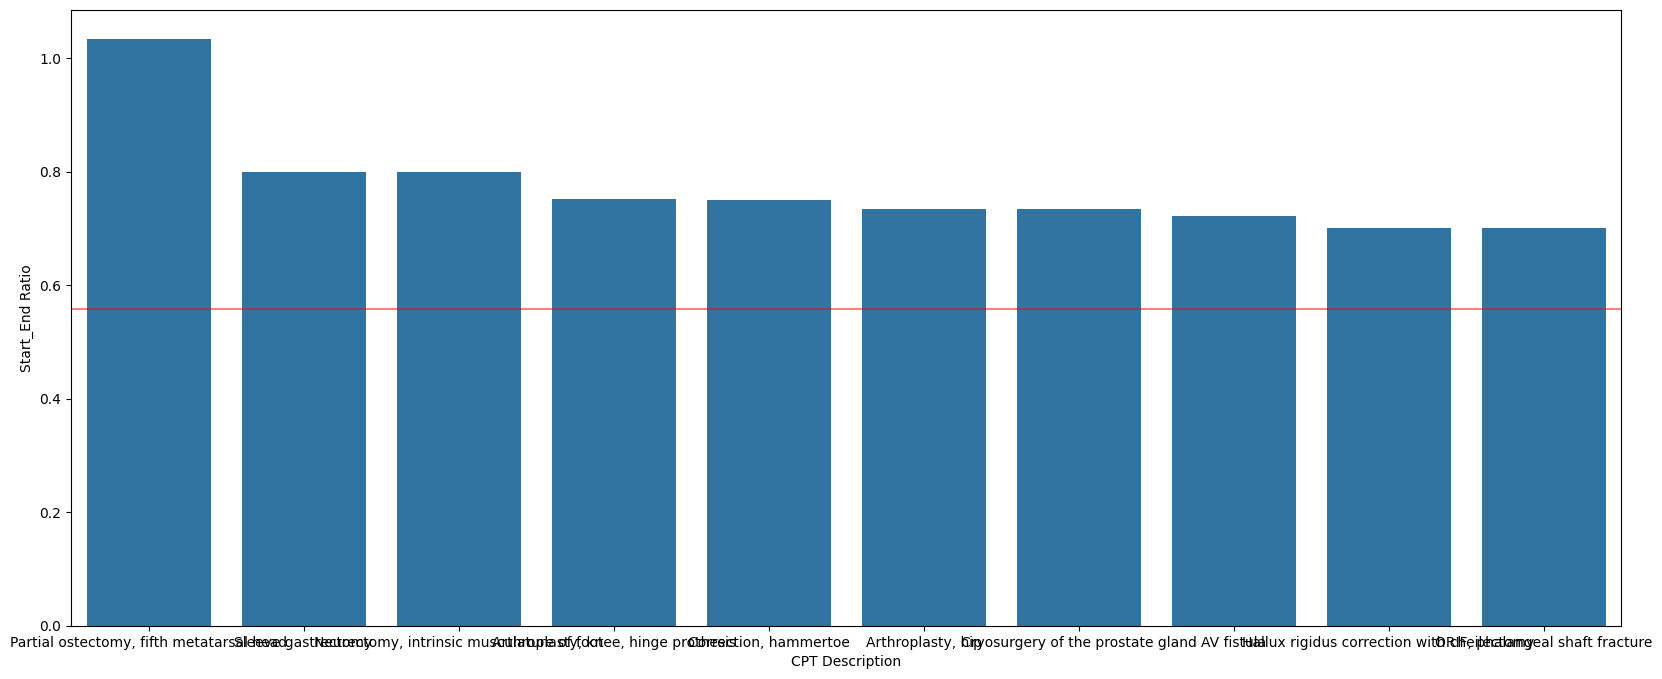

In [247]:
# CPT Description wise Start_End Ratio
A = data.groupby("CPT Description")["Start_End Ratio"].mean().reset_index().sort_values(by ="Start_End Ratio",ascending = False).head(10)
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="CPT Description",y = "Start_End Ratio")
# drawing average line
ax.axhline(data["Start_End Ratio"].mean(), color='red', alpha = 0.5)

#### OR Suites

In [248]:
data.groupby("OR Suite")["Start_End Ratio"].mean().reset_index()

,OR Suite,Start_End Ratio
0,1,0.660393
1,2,0.625507
2,3,0.398798
3,4,0.534055
4,5,0.515326
5,6,0.606965
6,7,0.587905
7,8,0.709050


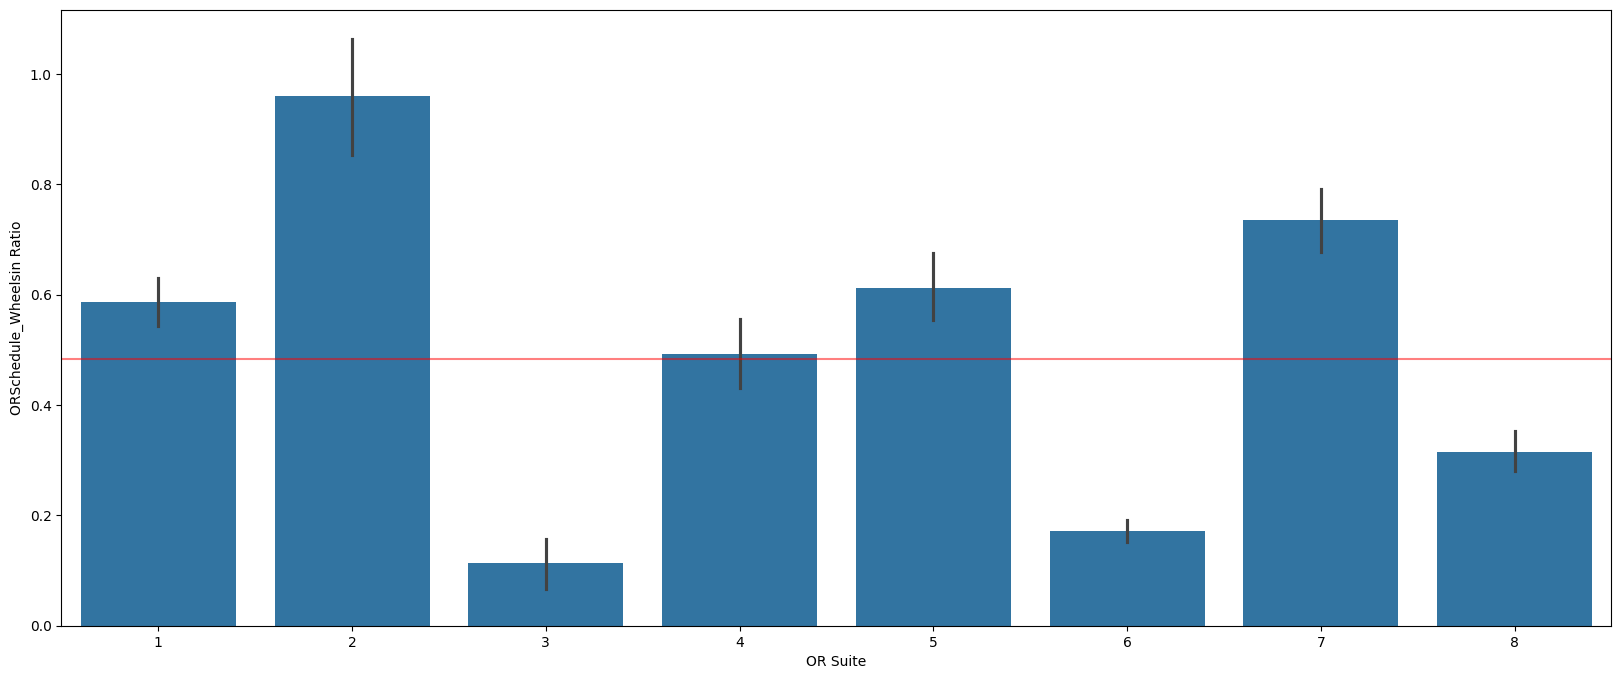

In [249]:
# OR Suite wise ORSchedule_Wheelsin Ratio
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="OR Suite",y = "ORSchedule_Wheelsin Ratio", estimator=np.mean)
# drawing average line
ax.axhline(data["ORSchedule_Wheelsin Ratio"].mean(), color='red', alpha = 0.5)

#### Week

In [250]:
data.groupby("Week#")["Start_End Ratio"].mean().reset_index()

,Week#,Start_End Ratio
0,01,0.557328
1,02,0.564826
2,03,0.562194
3,04,0.559371
4,05,0.558598
5,06,0.555596
6,07,0.563847
7,08,0.554589
8,09,0.557932
9,10,0.549447


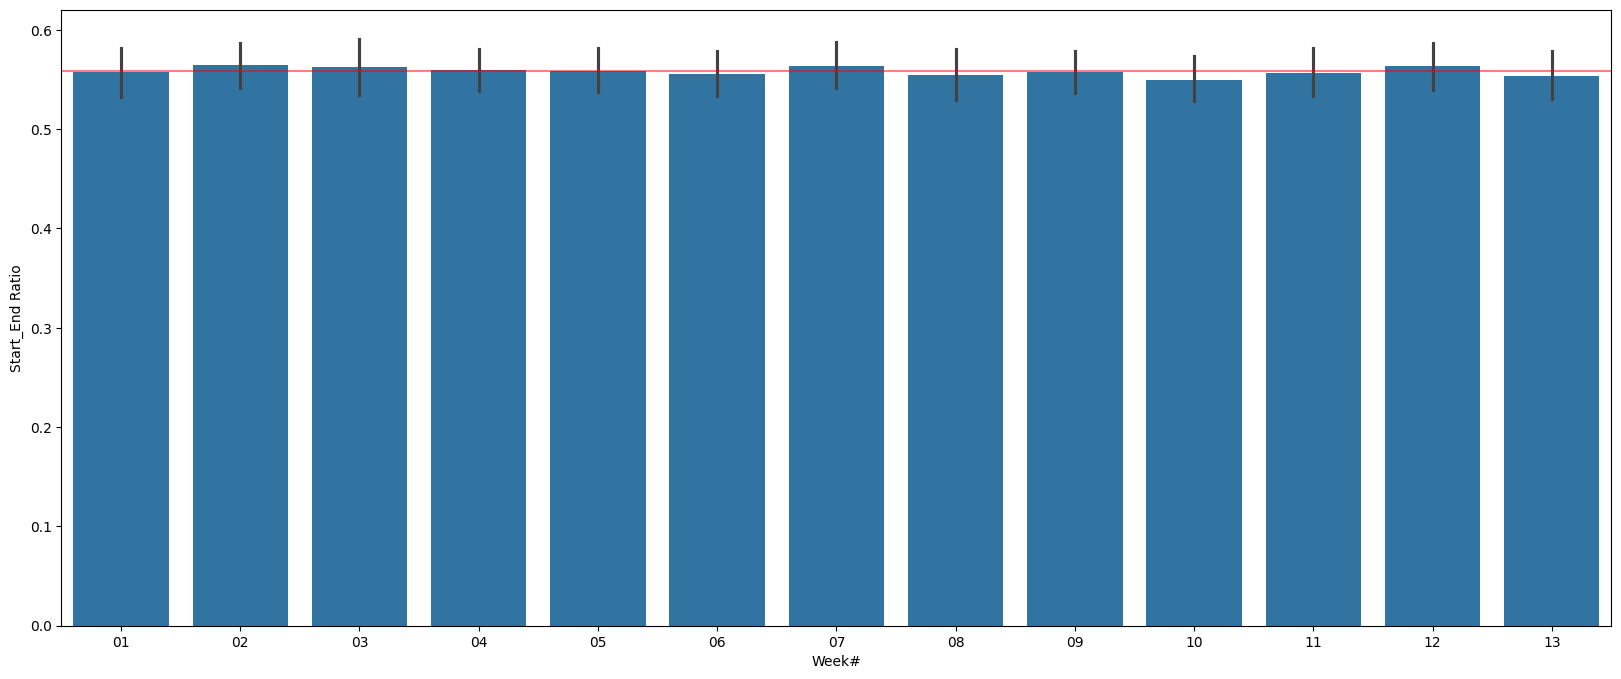

In [251]:
# Service wise Start_End Ratio
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="Week#",y = "Start_End Ratio", estimator=np.mean)
# drawing average line
ax.axhline(data["Start_End Ratio"].mean(), color='red', alpha = 0.5)

### End_Wheelsout

In [252]:
data["End_Wheelsout Ratio"].mean()

0.1790011765909556

#### Service

In [253]:
data.groupby("Service")["End_Wheelsout Ratio"].mean().reset_index()

,Service,End_Wheelsout Ratio
0,ENT,0.191371
1,General,0.123148
2,OBGYN,0.144167
3,Ophthalmology,0.195276
4,Orthopedics,0.180322
5,Pediatrics,0.223333
6,Plastic,0.129710
7,Podiatry,0.168442
8,Urology,0.198618
9,Vascular,0.197572


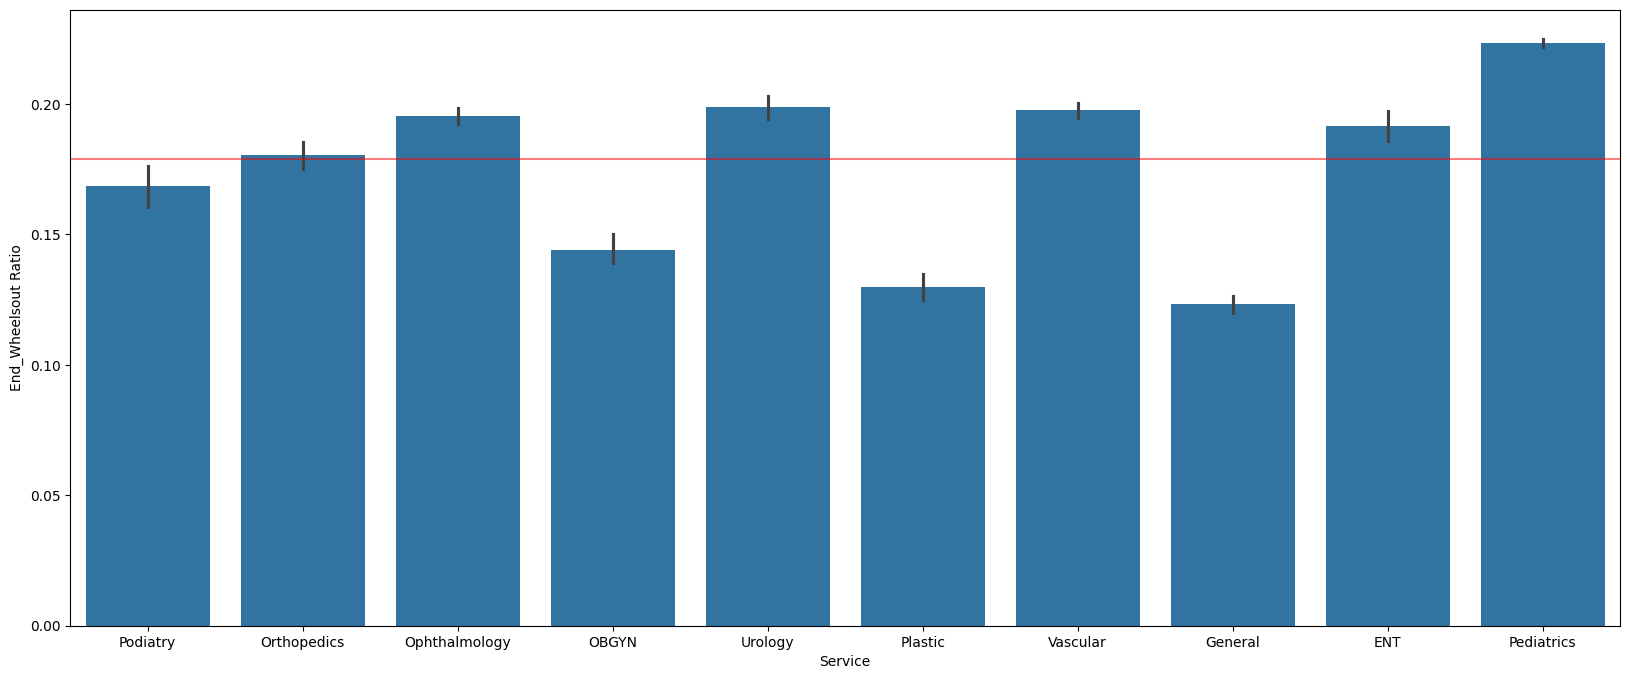

In [254]:
# Service wise End_Wheelsout Ratio
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="Service",y = "End_Wheelsout Ratio", estimator=np.mean)
# drawing average line
ax.axhline(data["End_Wheelsout Ratio"].mean(), color='red', alpha = 0.5)

#### CPT Description

In [255]:
data.groupby("CPT Description")["End_Wheelsout Ratio"].mean().reset_index()

,CPT Description,End_Wheelsout Ratio
0,AV fistula,0.181895
1,"Adjacent tissue transfer, eyelids, nose, ears,...",0.116860
2,"Arthroplasty, hip",0.150000
3,"Arthroplasty, knee, hinge prothesis",0.133841
4,"Arthroscopy, knee, surgical",0.223958
5,Bunionectomy with distal osteotomy,0.118039
6,"Carpal tunnel release, open",0.200000
7,Cervical biopsy,0.180000
8,"Correction, hammertoe",0.266667
9,Cryosurgery of the prostate gland,0.166667


In [256]:
data.groupby(["Service","CPT Description"])["End_Wheelsout Ratio"].mean().reset_index().sort_values(by ="End_Wheelsout Ratio",ascending = True).head(10)

,Service,CPT Description,End_Wheelsout Ratio
17,Plastic,Liposuction,0.077778
23,Podiatry,Lapidus bunionectomy,0.106667
5,OBGYN,"Hysterectomy, surgical",0.108333
19,Plastic,Rhinoplasty,0.108333
3,General,Sleeve gastrectomy,0.112500
16,Plastic,"Adjacent tissue transfer, eyelids, nose, ears,...",0.116860
20,Podiatry,Bunionectomy with distal osteotomy,0.118039
11,Orthopedics,"Fasciotomy, palmar, open",0.132275
0,ENT,Septoplasty,0.133333
25,Podiatry,"Partial ostectomy, fifth metatarsal head",0.133333


In [257]:
data.groupby(["Service","CPT Description"])["End_Wheelsout Ratio"].mean().reset_index().sort_values(by ="End_Wheelsout Ratio",ascending = False).head(10)

,Service,CPT Description,End_Wheelsout Ratio
21,Podiatry,"Correction, hammertoe",0.266667
15,Pediatrics,"Tympanostomy, general anesthesia",0.227778
9,Orthopedics,"Arthroscopy, knee, surgical",0.223958
31,Vascular,"Digital amputation, metatarsophalangeal joint",0.216667
14,Pediatrics,"Myringotomy, general anesthesia",0.216667
28,Urology,Cystourethroscopy,0.213596
12,Orthopedics,Flexor tendon repair,0.211111
1,ENT,Tonsillectomy,0.209051
26,Podiatry,Plantar fasciotomy,0.208333
10,Orthopedics,"Carpal tunnel release, open",0.200000


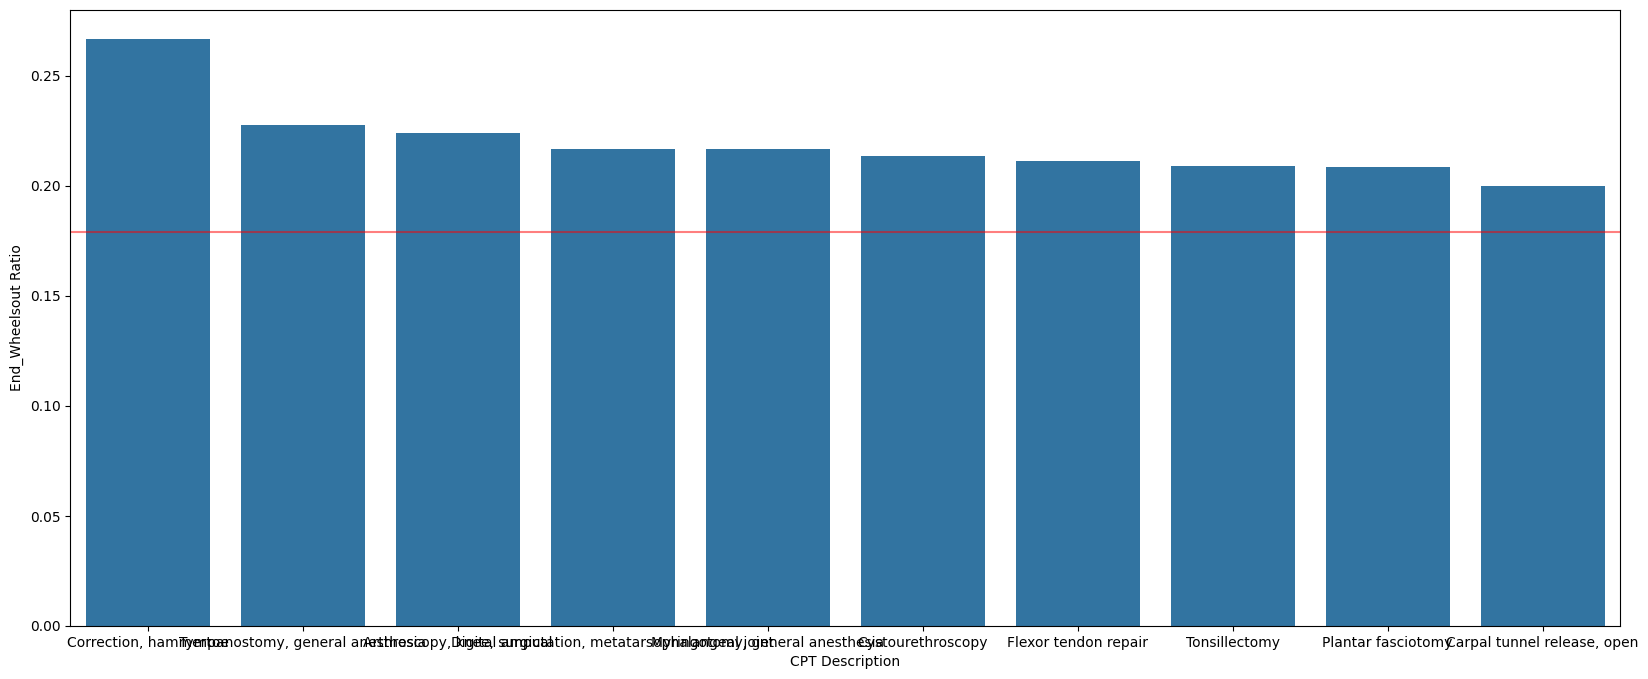

In [258]:
# CPT Description wise End_Wheelsout Ratio
A = data.groupby("CPT Description")["End_Wheelsout Ratio"].mean().reset_index().sort_values(by ="End_Wheelsout Ratio",ascending = False).head(10)
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="CPT Description",y = "End_Wheelsout Ratio")
# drawing average line
ax.axhline(data["End_Wheelsout Ratio"].mean(), color='red', alpha = 0.5)

#### OR Suites

In [259]:
data.groupby("OR Suite")["End_Wheelsout Ratio"].mean().reset_index()

,OR Suite,End_Wheelsout Ratio
0,1,0.168442
1,2,0.190906
2,3,0.201987
3,4,0.160609
4,5,0.198019
5,6,0.129710
6,7,0.207859
7,8,0.130018


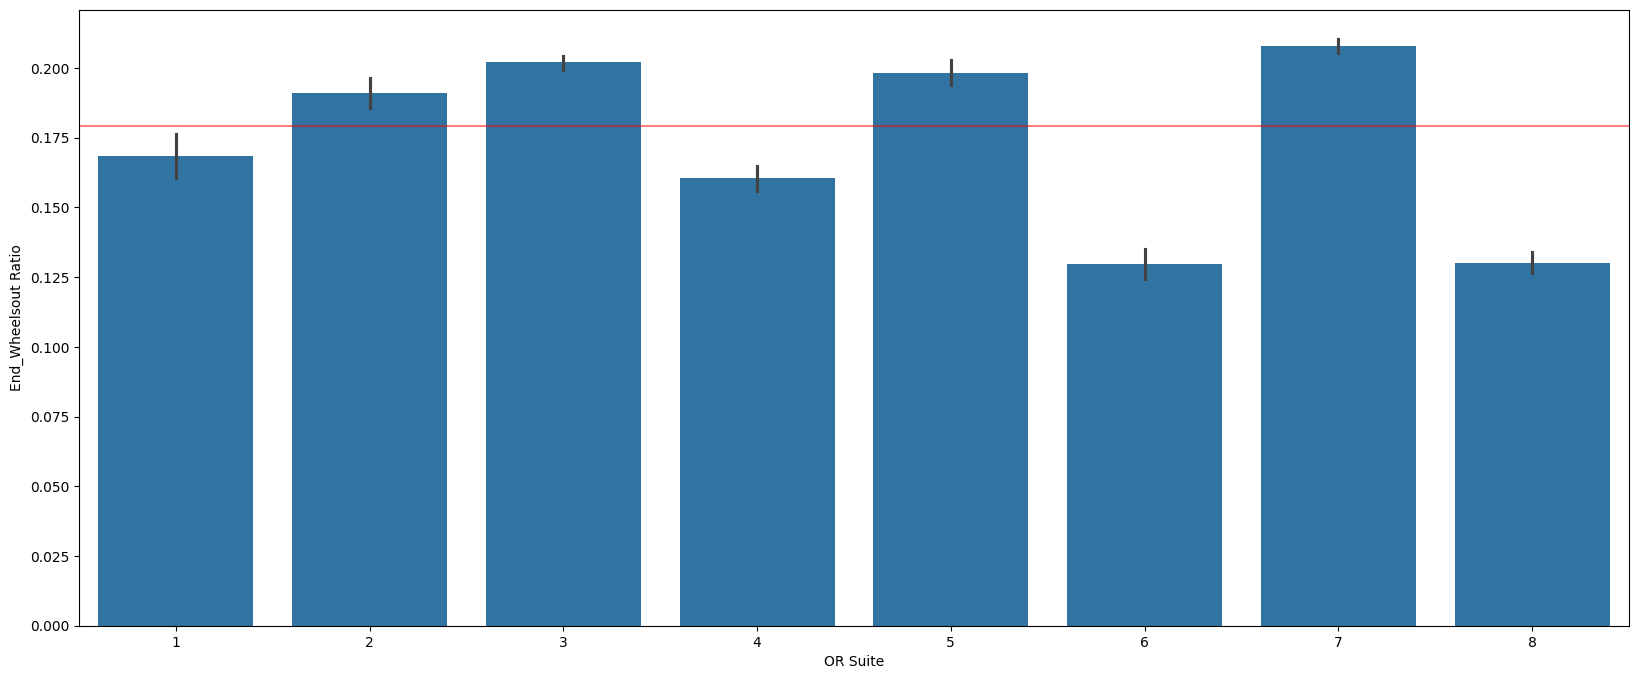

In [260]:
# OR Suite wise End_Wheelsout Ratio
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="OR Suite",y = "End_Wheelsout Ratio", estimator=np.mean)
# drawing average line
ax.axhline(data["End_Wheelsout Ratio"].mean(), color='red', alpha = 0.5)

#### Week

In [261]:
data.groupby("Week#")["End_Wheelsout Ratio"].mean().reset_index()

,Week#,End_Wheelsout Ratio
0,01,0.176229
1,02,0.183412
2,03,0.175466
3,04,0.181680
4,05,0.181146
5,06,0.180649
6,07,0.178043
7,08,0.178709
8,09,0.180919
9,10,0.177465


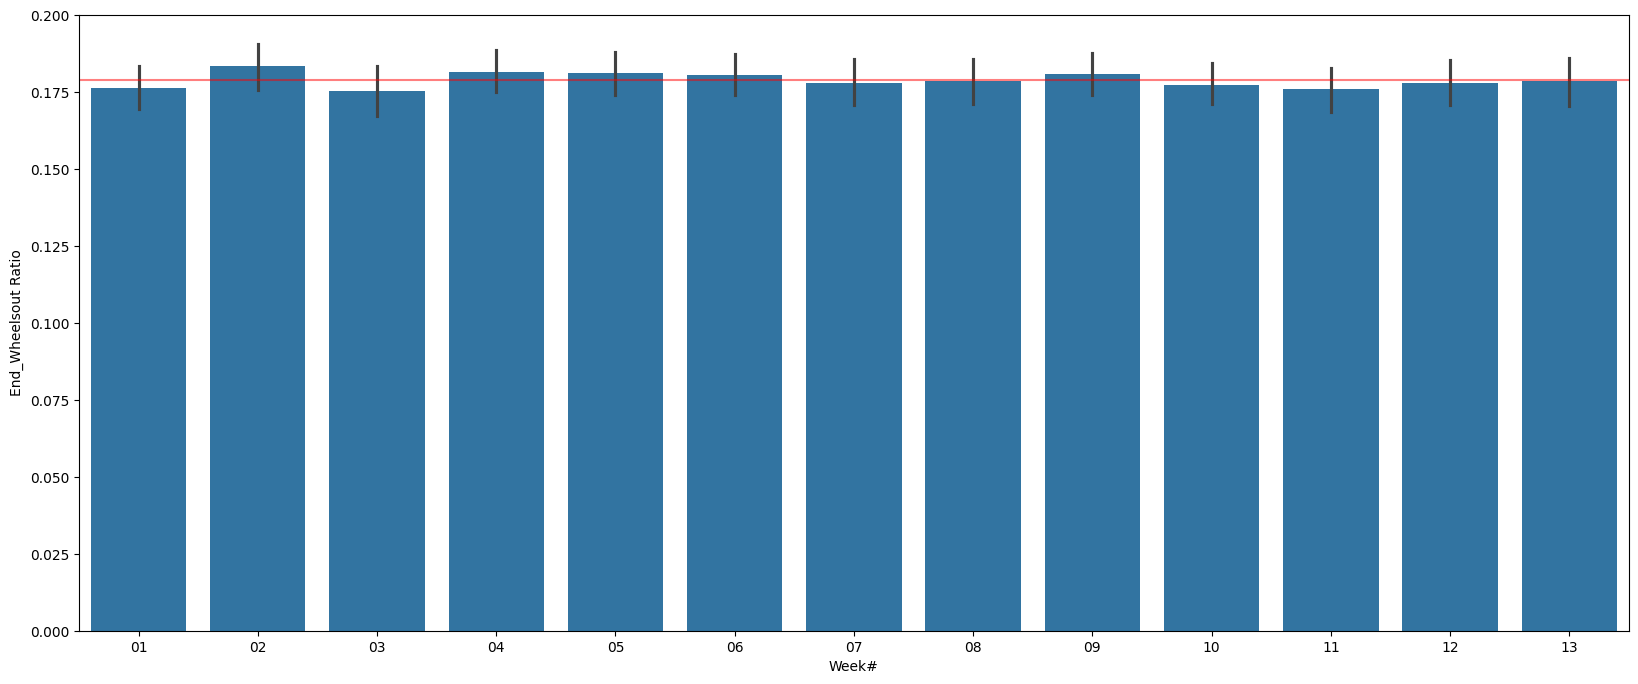

In [262]:
# Service wise End_Wheelsout Ratio
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = data, x ="Week#",y = "End_Wheelsout Ratio", estimator=np.mean)
# drawing average line
ax.axhline(data["End_Wheelsout Ratio"].mean(), color='red', alpha = 0.5)

### Planned Vs Actual Usage

In [263]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'BookingHr', 'ORSchedule_Wheelsin', 'Wheelsin_Start', 'Start_End',
       'End_Wheelsout', 'Wheelsin_Wheelsout', 'ORSchedule_Wheelsout',
       'ORSchedule_Wheelsin Ratio', 'Wheelsin_Start Ratio', 'Start_End Ratio',
       'End_Wheelsout Ratio', 'ORSchedule_Wheelsout Ratio'],
      dtype='object')

<Axes: xlabel='Wheelsin_Wheelsout', ylabel='Booked Time (min)'>

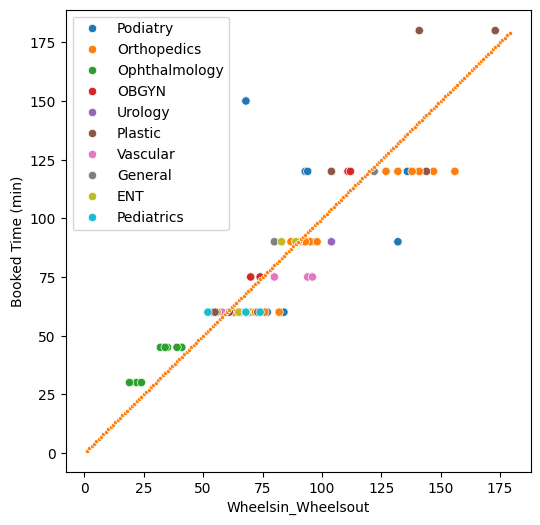

In [264]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=data, x = "Wheelsin_Wheelsout",y= "Booked Time (min)" , hue = "Service")
A =np.arange(1,180,1)
sns.scatterplot(x =A ,y= A,marker = ".")

### Utilization Rate

In [265]:
# Overall Utilization Ratio w.r.t planned Booked time [OR Schedule]
data["Wheelsin_Wheelsout"].sum()/data["Booked Time (min)"].sum() * 100

103.24893382243296

In [ ]:
# Overall Engagement Ratio W.r.t Blocked Time
(data["ORSchedule_Wheelsout"].sum()/data["Booked Time (min)"].sum())*100

149.29527899555634

In [267]:
Total_days = (data.Date.max() -data.Date.min())/np.timedelta64(1,"D")
Total_days

87.0

In [268]:
print(min(data["OR Schedule"].dt.time))

07:00:00


In [269]:
print(max(data["OR Schedule"].dt.time))

15:15:00


In [270]:
print(max(data["Wheels Out"].dt.time))

16:40:00


* OR Booking are Done Between : 7:00 to 17:00
* That gives 10 Hrs per Day only ie., 600 mins per day per OR Suite

In [271]:
# Overall Utilization Rate w.r.t avaiable time considering all days as working Days
(data["Wheelsin_Wheelsout"].sum()/( Total_days * 600 * data["OR Suite"].nunique())) * 100

41.451628352490424

In [272]:
data.Date.nunique()

62

In [340]:
# Overall Engagement time Utilization Rate w.r.t avaiable time only given Working working Days
(data["ORSchedule_Wheelsout"].sum()/( 62 * 600 * data["OR Suite"].nunique())) * 100

84.1065188172043

In [273]:
# Overall Actual Utilization Rate w.r.t avaiable time only given Working working Days
(data["Wheelsin_Wheelsout"].sum()/( 62 * 600 * data["OR Suite"].nunique())) * 100

58.16599462365591

#### OR Suite

In [274]:
A = data.groupby("OR Suite")[["Booked Time (min)","Wheelsin_Wheelsout"]].sum().reset_index()

In [275]:
A.loc[:,"Available Time"] = 62* 600

In [276]:
A["Actual VS Planned"] = A["Wheelsin_Wheelsout"]/A["Booked Time (min)"] * 100
A["Actual VS TotalAvailable"] = A["Wheelsin_Wheelsout"]/A["Available Time"] * 100

In [277]:
A

,OR Suite,Booked Time (min),Wheelsin_Wheelsout,Available Time,Actual VS Planned,Actual VS TotalAvailable
0,1,22020,23205.0,37200,105.381471,62.379032
1,2,19770,22955.0,37200,116.110268,61.706989
2,3,21210,18911.0,37200,89.160773,50.836022
3,4,22860,22215.0,37200,97.178478,59.717742
4,5,19080,20100.0,37200,105.345912,54.032258
5,6,22860,21408.0,37200,93.648294,57.548387
6,7,18705,21634.0,37200,115.658915,58.155914
7,8,21150,22674.0,37200,107.205674,60.951613


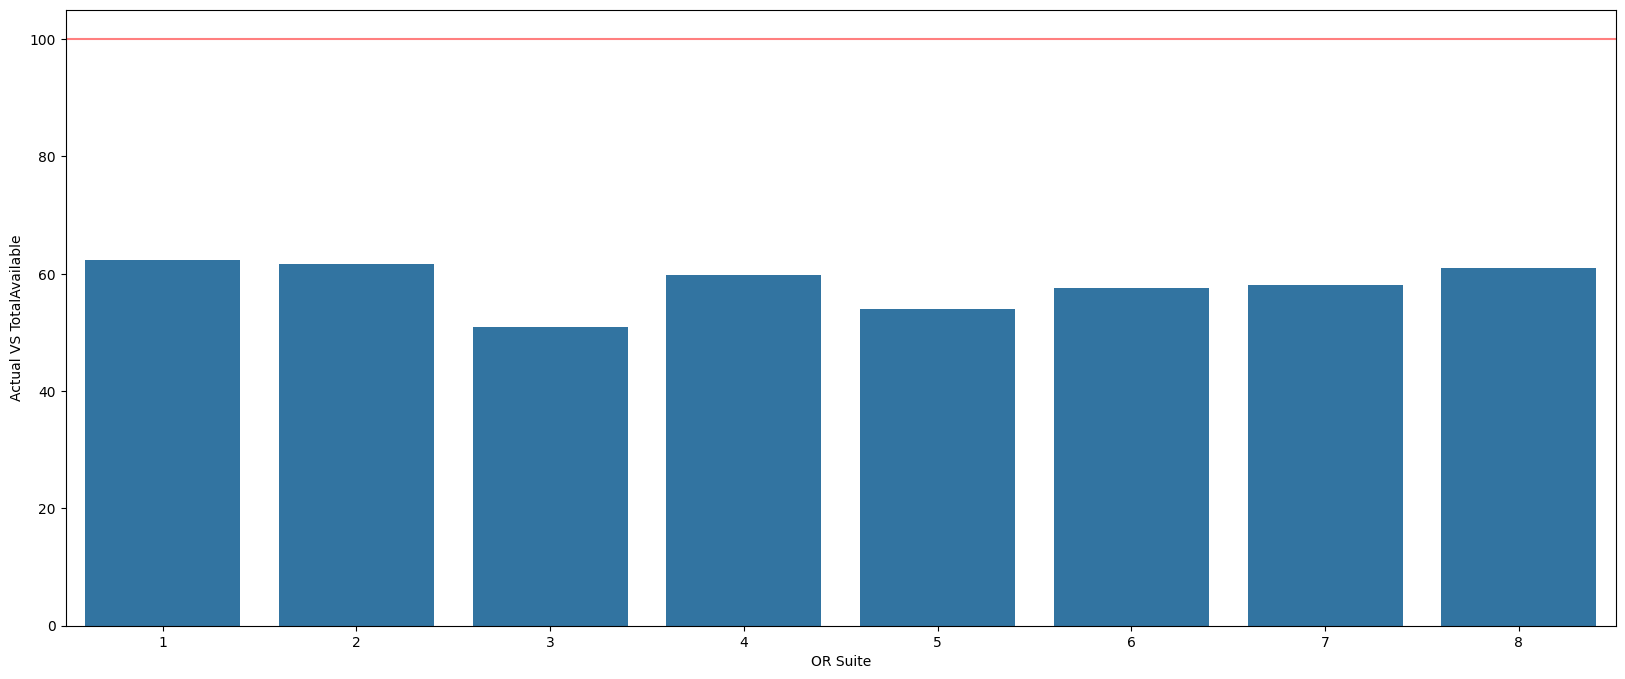

In [278]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="OR Suite",y = "Actual VS TotalAvailable")
ax.axhline(100, color='red', alpha = 0.5)

#### week

In [279]:
 A = data.groupby("Week#").aggregate({"Date":"nunique","Booked Time (min)":"sum","Wheelsin_Wheelsout":"sum"}).reset_index()

In [280]:
A.loc[:,"Available Time"] = A["Date"]* 600 * data["OR Suite"].nunique()

In [281]:
A["Actual VS Planned"] = A["Wheelsin_Wheelsout"]/A["Booked Time (min)"] * 100
A["Actual VS TotalAvailable"] = A["Wheelsin_Wheelsout"]/A["Available Time"] * 100

In [282]:
A

,Week#,Date,Booked Time (min),Wheelsin_Wheelsout,Available Time,Actual VS Planned,Actual VS TotalAvailable
0,01,5,13605,13944.0,24000,102.491731,58.100000
1,02,5,13005,13587.0,24000,104.475202,56.612500
2,03,4,10890,11121.0,19200,102.121212,57.921875
3,04,5,13230,13783.0,24000,104.179894,57.429167
4,05,5,13350,13876.0,24000,103.940075,57.816667
5,06,5,13395,13891.0,24000,103.702874,57.879167
6,07,5,13560,13941.0,24000,102.809735,58.087500
7,08,4,10905,11251.0,19200,103.172856,58.598958
8,09,5,13455,13971.0,24000,103.835006,58.212500
9,10,5,13875,14297.0,24000,103.041441,59.570833


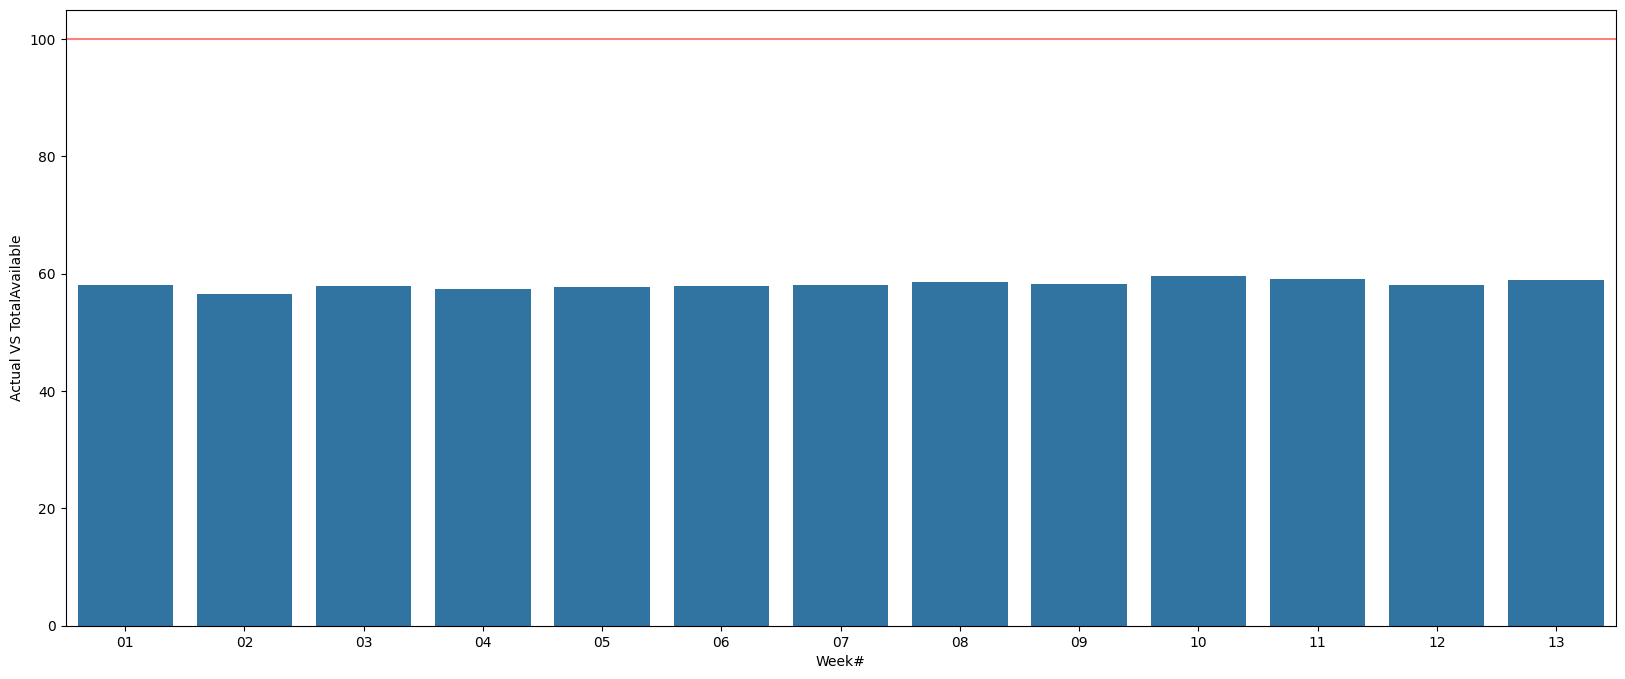

In [283]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="Week#",y = "Actual VS TotalAvailable")
ax.axhline(100, color='red', alpha = 0.5)

In [284]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'BookingHr', 'ORSchedule_Wheelsin', 'Wheelsin_Start', 'Start_End',
       'End_Wheelsout', 'Wheelsin_Wheelsout', 'ORSchedule_Wheelsout',
       'ORSchedule_Wheelsin Ratio', 'Wheelsin_Start Ratio', 'Start_End Ratio',
       'End_Wheelsout Ratio', 'ORSchedule_Wheelsout Ratio'],
      dtype='object')

#### Service

In [285]:
 A = data.groupby(["Service"]).aggregate({"OR Suite":"nunique","Booked Time (min)":"sum","Wheelsin_Wheelsout":"sum"}).reset_index()

In [286]:
A["Actual VS Planned"] = A["Wheelsin_Wheelsout"]/A["Booked Time (min)"] * 100

In [287]:
A

,Service,OR Suite,Booked Time (min),Wheelsin_Wheelsout,Actual VS Planned
0,ENT,1,13200,13612.0,103.121212
1,General,1,12870,13221.0,102.727273
2,OBGYN,1,15990,15047.0,94.102564
3,Ophthalmology,1,14910,11981.0,80.355466
4,Orthopedics,2,28050,32408.0,115.536542
5,Pediatrics,2,13200,14520.0,110.000000
6,Plastic,1,22860,21408.0,93.648294
7,Podiatry,1,22020,23205.0,105.381471
8,Urology,2,12750,13656.0,107.105882
9,Vascular,1,11805,14044.0,118.966540


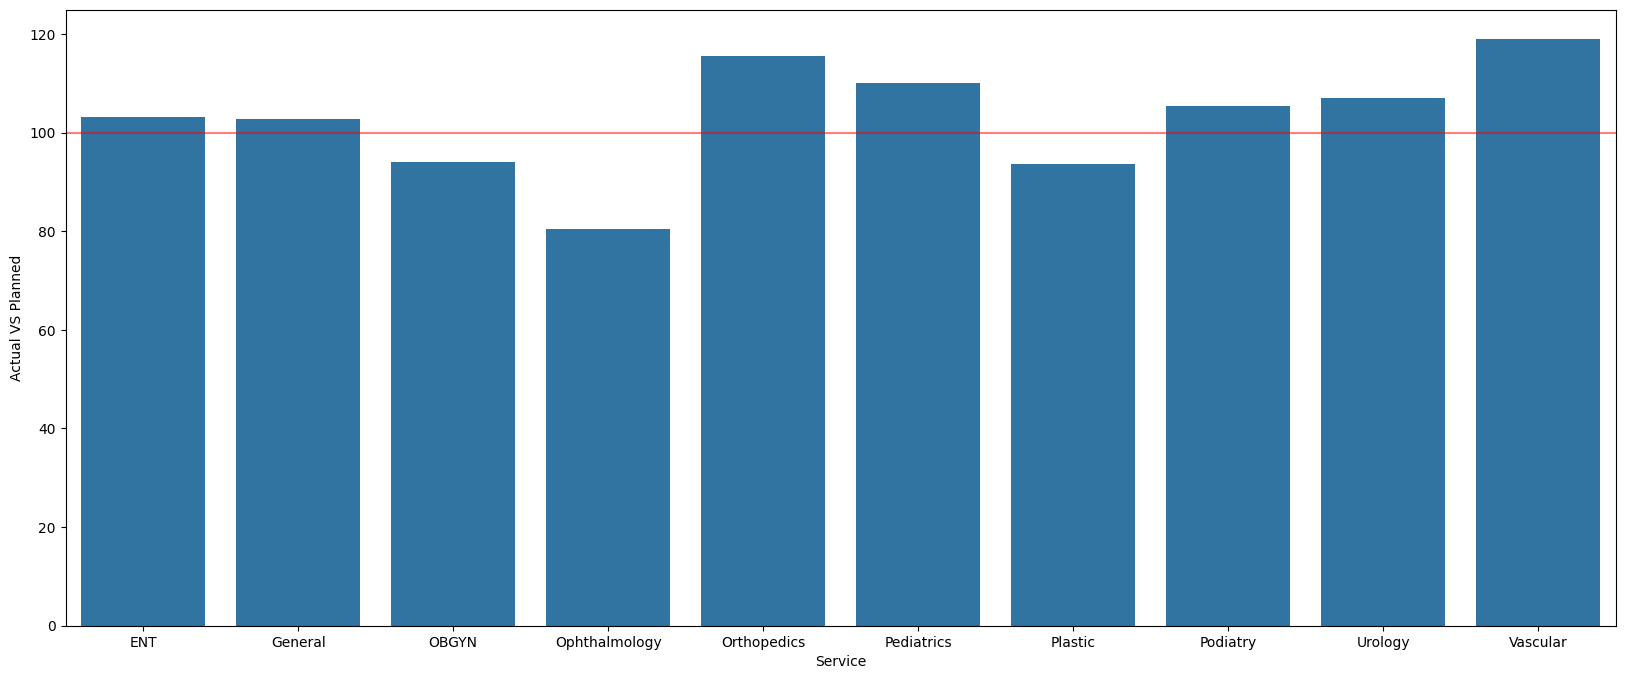

In [288]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(data = A, x ="Service",y = "Actual VS Planned")
ax.axhline(100, color='red', alpha = 0.5)

### Overall Stages Ratios

In [289]:
data.head()

,Encounter ID,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,...,Wheelsin_Start,Start_End,End_Wheelsout,Wheelsin_Wheelsout,ORSchedule_Wheelsout,ORSchedule_Wheelsin Ratio,Wheelsin_Start Ratio,Start_End Ratio,End_Wheelsout Ratio,ORSchedule_Wheelsout Ratio
0,10001,2022-01-03,1,Podiatry,28110,"Partial ostectomy, fifth metatarsal head",90,2022-01-03 07:00:00,2022-01-03 07:05:00,2022-01-03 07:32:00,...,27.0,93.0,12.0,132.0,137.0,0.055556,0.300000,1.033333,0.133333,1.522222
1,10002,2022-01-03,1,Podiatry,28055,"Neurectomy, intrinsic musculature of foot",60,2022-01-03 08:45:00,2022-01-03 09:48:00,2022-01-03 10:13:00,...,25.0,48.0,11.0,84.0,147.0,1.050000,0.416667,0.800000,0.183333,2.450000
2,10003,2022-01-03,1,Podiatry,28297,Lapidus bunionectomy,150,2022-01-03 10:00:00,2022-01-03 11:50:00,2022-01-03 12:20:00,...,30.0,22.0,16.0,68.0,178.0,0.733333,0.200000,0.146667,0.106667,1.186667
3,10004,2022-01-03,1,Podiatry,28296,Bunionectomy with distal osteotomy,120,2022-01-03 12:45:00,2022-01-03 13:29:00,2022-01-03 13:53:00,...,24.0,57.0,12.0,93.0,137.0,0.366667,0.200000,0.475000,0.100000,1.141667
4,10005,2022-01-03,2,Orthopedics,27445,"Arthroplasty, knee, hinge prothesis",120,2022-01-03 07:00:00,2022-01-03 07:15:00,2022-01-03 07:50:00,...,35.0,108.0,13.0,156.0,171.0,0.125000,0.291667,0.900000,0.108333,1.425000


In [290]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'BookingHr', 'ORSchedule_Wheelsin', 'Wheelsin_Start', 'Start_End',
       'End_Wheelsout', 'Wheelsin_Wheelsout', 'ORSchedule_Wheelsout',
       'ORSchedule_Wheelsin Ratio', 'Wheelsin_Start Ratio', 'Start_End Ratio',
       'End_Wheelsout Ratio', 'ORSchedule_Wheelsout Ratio'],
      dtype='object')

#### Service

In [291]:
A = data.groupby("Service")[['ORSchedule_Wheelsin Ratio','Wheelsin_Start Ratio', 'Start_End Ratio',
                             'End_Wheelsout Ratio',"ORSchedule_Wheelsout Ratio"]].mean().reset_index()
A

,Service,ORSchedule_Wheelsin Ratio,Wheelsin_Start Ratio,Start_End Ratio,End_Wheelsout Ratio,ORSchedule_Wheelsout Ratio
0,ENT,0.469430,0.351043,0.497631,0.191371,1.509475
1,General,0.336111,0.181481,0.711111,0.123148,1.351852
2,OBGYN,0.248333,0.256250,0.544167,0.144167,1.192917
3,Ophthalmology,-0.093114,0.241550,0.365935,0.195276,0.709647
4,Orthopedics,0.813828,0.340005,0.642714,0.180322,1.976869
5,Pediatrics,0.770000,0.373333,0.503333,0.223333,1.870000
6,Plastic,0.171337,0.224316,0.606965,0.129710,1.132327
7,Podiatry,0.585908,0.307520,0.660393,0.168442,1.722263
8,Urology,0.901900,0.329016,0.534888,0.198618,1.964421
9,Vascular,0.713160,0.342312,0.644123,0.197572,1.897168


In [292]:
A= data.groupby("Service").aggregate({"Encounter ID":"count","ORSchedule_Wheelsout Ratio":"mean"})
A

,Encounter ID,ORSchedule_Wheelsout Ratio
Service,,
ENT,197,1.509475
General,117,1.351852
OBGYN,164,1.192917
Ophthalmology,334,0.709647
Orthopedics,321,1.976869
Pediatrics,220,1.870000
Plastic,207,1.132327
Podiatry,246,1.722263
Urology,193,1.964421


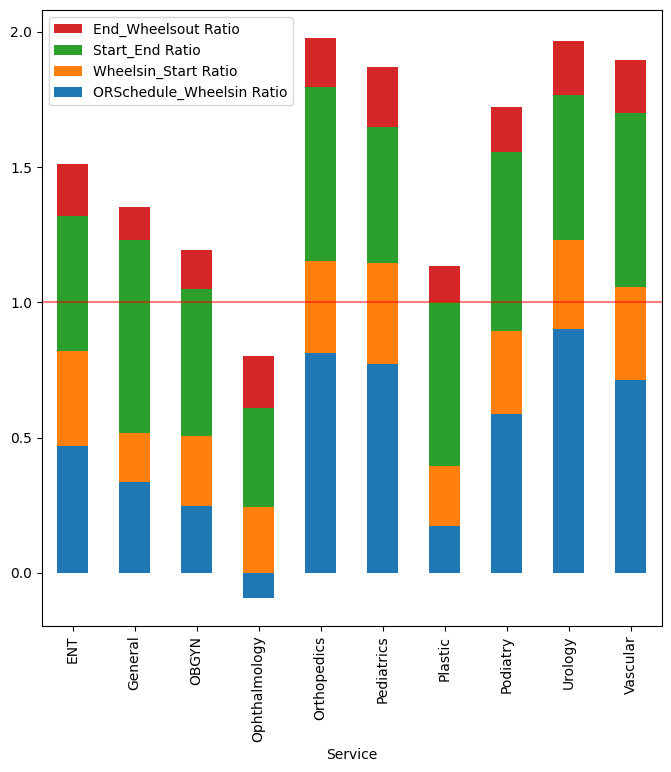

In [293]:
A = data.groupby("Service")[['ORSchedule_Wheelsin Ratio','Wheelsin_Start Ratio', 'Start_End Ratio', 'End_Wheelsout Ratio']].mean().reset_index()
A.set_index("Service", inplace = True)
fig, ax = plt.subplots(figsize=(20,8))
A.plot( kind='bar', stacked=True, figsize = (8,8),legend = "reverse", ax =ax)
# drawing average line
ax.axhline(1, color='red', alpha = 0.5,)


In [294]:
data[data.Service == "ENT"]

,Encounter ID,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,...,Wheelsin_Start,Start_End,End_Wheelsout,Wheelsin_Wheelsout,ORSchedule_Wheelsout,ORSchedule_Wheelsin Ratio,Wheelsin_Start Ratio,Start_End Ratio,End_Wheelsout Ratio,ORSchedule_Wheelsout Ratio
53,10054,2022-01-04,5,ENT,42826,Tonsillectomy,60,2022-01-04 07:00:00,2022-01-04 07:04:00,2022-01-04 07:24:00,...,20.0,25.0,11.0,56.0,60.0,0.066667,0.333333,0.416667,0.183333,1.000000
54,10055,2022-01-04,5,ENT,30520,Septoplasty,90,2022-01-04 08:15:00,2022-01-04 08:30:00,2022-01-04 08:48:00,...,18.0,52.0,13.0,83.0,98.0,0.166667,0.200000,0.577778,0.144444,1.088889
55,10056,2022-01-04,5,ENT,30520,Septoplasty,90,2022-01-04 10:00:00,2022-01-04 10:20:00,2022-01-04 10:45:00,...,25.0,53.0,11.0,89.0,109.0,0.222222,0.277778,0.588889,0.122222,1.211111
56,10057,2022-01-04,5,ENT,42826,Tonsillectomy,60,2022-01-04 11:45:00,2022-01-04 12:30:00,2022-01-04 12:54:00,...,24.0,32.0,12.0,68.0,113.0,0.750000,0.400000,0.533333,0.200000,1.883333
57,10058,2022-01-04,5,ENT,42826,Tonsillectomy,60,2022-01-04 13:00:00,2022-01-04 14:05:00,2022-01-04 14:28:00,...,23.0,32.0,10.0,65.0,130.0,1.083333,0.383333,0.533333,0.166667,2.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,12156,2022-03-31,5,ENT,42826,Tonsillectomy,60,2022-03-31 07:00:00,2022-03-31 07:04:00,2022-03-31 07:24:00,...,20.0,25.0,11.0,56.0,60.0,0.066667,0.333333,0.416667,0.183333,1.000000
2156,12157,2022-03-31,5,ENT,30520,Septoplasty,90,2022-03-31 08:15:00,2022-03-31 08:30:00,2022-03-31 08:48:00,...,18.0,52.0,13.0,83.0,98.0,0.166667,0.200000,0.577778,0.144444,1.088889
2157,12158,2022-03-31,5,ENT,30520,Septoplasty,90,2022-03-31 10:00:00,2022-03-31 10:20:00,2022-03-31 10:45:00,...,25.0,53.0,11.0,89.0,109.0,0.222222,0.277778,0.588889,0.122222,1.211111
2158,12159,2022-03-31,5,ENT,42826,Tonsillectomy,60,2022-03-31 11:45:00,2022-03-31 12:30:00,2022-03-31 12:54:00,...,24.0,32.0,12.0,68.0,113.0,0.750000,0.400000,0.533333,0.200000,1.883333


#### OR Suite

In [295]:
A = data.groupby("OR Suite")[['ORSchedule_Wheelsin Ratio','Wheelsin_Start Ratio', 'Start_End Ratio',
                             'End_Wheelsout Ratio',"ORSchedule_Wheelsout Ratio"]].mean().reset_index()
A

,OR Suite,ORSchedule_Wheelsin Ratio,Wheelsin_Start Ratio,Start_End Ratio,End_Wheelsout Ratio,ORSchedule_Wheelsout Ratio
0,1,0.585908,0.307520,0.660393,0.168442,1.722263
1,2,0.959843,0.352480,0.625507,0.190906,2.128737
2,3,0.113326,0.273070,0.398798,0.201987,0.987180
3,4,0.492761,0.283862,0.534055,0.160609,1.471287
4,5,0.612626,0.344775,0.515326,0.198019,1.670746
5,6,0.171337,0.224316,0.606965,0.129710,1.132327
6,7,0.735856,0.354699,0.587905,0.207859,1.886319
7,8,0.315502,0.223387,0.709050,0.130018,1.377957


In [296]:
A= data.groupby("OR Suite").aggregate({"Encounter ID":"count","ORSchedule_Wheelsout Ratio":"mean"})
A

,Encounter ID,ORSchedule_Wheelsout Ratio
OR Suite,,
1,246,1.722263
2,252,2.128737
3,439,0.987180
4,268,1.471287
5,286,1.670746
6,207,1.132327
7,288,1.886319
8,186,1.377957


In [297]:
A= data.groupby(["OR Suite", "Service"]).aggregate({"Encounter ID":"count","ORSchedule_Wheelsout Ratio":"mean"}).reset_index()
A

,OR Suite,Service,Encounter ID,ORSchedule_Wheelsout Ratio
0,1,Podiatry,246,1.722263
1,2,Orthopedics,252,2.128737
2,3,Ophthalmology,334,0.709647
3,3,Pediatrics,105,1.870000
4,4,OBGYN,164,1.192917
5,4,Urology,104,1.910256
6,5,ENT,197,1.509475
7,5,Urology,89,2.027715
8,6,Plastic,207,1.132327
9,7,Pediatrics,115,1.870000


In [298]:
A

,OR Suite,Service,Encounter ID,ORSchedule_Wheelsout Ratio
0,1,Podiatry,246,1.722263
1,2,Orthopedics,252,2.128737
2,3,Ophthalmology,334,0.709647
3,3,Pediatrics,105,1.870000
4,4,OBGYN,164,1.192917
5,4,Urology,104,1.910256
6,5,ENT,197,1.509475
7,5,Urology,89,2.027715
8,6,Plastic,207,1.132327
9,7,Pediatrics,115,1.870000


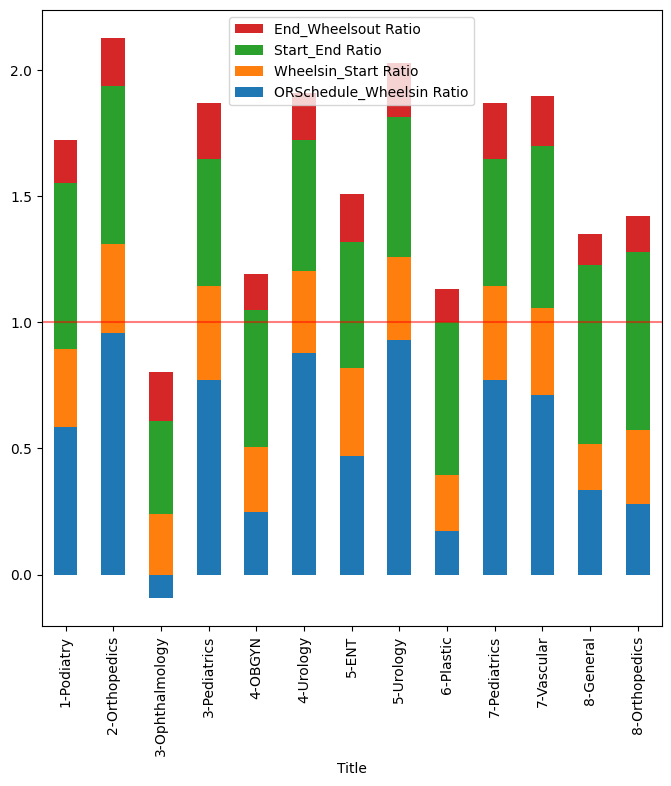

In [299]:
A = data.groupby(["OR Suite", "Service"])[['ORSchedule_Wheelsin Ratio','Wheelsin_Start Ratio', 'Start_End Ratio', 'End_Wheelsout Ratio']].mean().reset_index()
A["Title"] = A.apply(lambda row: '-'.join([str(row["OR Suite"]), str(row["Service"])]), axis=1)
A.drop(["OR Suite", "Service"],axis=1, inplace=True)
A.set_index("Title", inplace = True)
fig, ax = plt.subplots(figsize=(20,8))
A.plot( kind='bar', stacked=True, figsize = (8,8),legend = "reverse", ax =ax)
# drawing average line
ax.axhline(1, color='red', alpha = 0.5,)


In [300]:
data[data.Service == "ENT"]

,Encounter ID,Date,OR Suite,Service,CPT Code,CPT Description,Booked Time (min),OR Schedule,Wheels In,Start Time,...,Wheelsin_Start,Start_End,End_Wheelsout,Wheelsin_Wheelsout,ORSchedule_Wheelsout,ORSchedule_Wheelsin Ratio,Wheelsin_Start Ratio,Start_End Ratio,End_Wheelsout Ratio,ORSchedule_Wheelsout Ratio
53,10054,2022-01-04,5,ENT,42826,Tonsillectomy,60,2022-01-04 07:00:00,2022-01-04 07:04:00,2022-01-04 07:24:00,...,20.0,25.0,11.0,56.0,60.0,0.066667,0.333333,0.416667,0.183333,1.000000
54,10055,2022-01-04,5,ENT,30520,Septoplasty,90,2022-01-04 08:15:00,2022-01-04 08:30:00,2022-01-04 08:48:00,...,18.0,52.0,13.0,83.0,98.0,0.166667,0.200000,0.577778,0.144444,1.088889
55,10056,2022-01-04,5,ENT,30520,Septoplasty,90,2022-01-04 10:00:00,2022-01-04 10:20:00,2022-01-04 10:45:00,...,25.0,53.0,11.0,89.0,109.0,0.222222,0.277778,0.588889,0.122222,1.211111
56,10057,2022-01-04,5,ENT,42826,Tonsillectomy,60,2022-01-04 11:45:00,2022-01-04 12:30:00,2022-01-04 12:54:00,...,24.0,32.0,12.0,68.0,113.0,0.750000,0.400000,0.533333,0.200000,1.883333
57,10058,2022-01-04,5,ENT,42826,Tonsillectomy,60,2022-01-04 13:00:00,2022-01-04 14:05:00,2022-01-04 14:28:00,...,23.0,32.0,10.0,65.0,130.0,1.083333,0.383333,0.533333,0.166667,2.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,12156,2022-03-31,5,ENT,42826,Tonsillectomy,60,2022-03-31 07:00:00,2022-03-31 07:04:00,2022-03-31 07:24:00,...,20.0,25.0,11.0,56.0,60.0,0.066667,0.333333,0.416667,0.183333,1.000000
2156,12157,2022-03-31,5,ENT,30520,Septoplasty,90,2022-03-31 08:15:00,2022-03-31 08:30:00,2022-03-31 08:48:00,...,18.0,52.0,13.0,83.0,98.0,0.166667,0.200000,0.577778,0.144444,1.088889
2157,12158,2022-03-31,5,ENT,30520,Septoplasty,90,2022-03-31 10:00:00,2022-03-31 10:20:00,2022-03-31 10:45:00,...,25.0,53.0,11.0,89.0,109.0,0.222222,0.277778,0.588889,0.122222,1.211111
2158,12159,2022-03-31,5,ENT,42826,Tonsillectomy,60,2022-03-31 11:45:00,2022-03-31 12:30:00,2022-03-31 12:54:00,...,24.0,32.0,12.0,68.0,113.0,0.750000,0.400000,0.533333,0.200000,1.883333


### Projected Savings

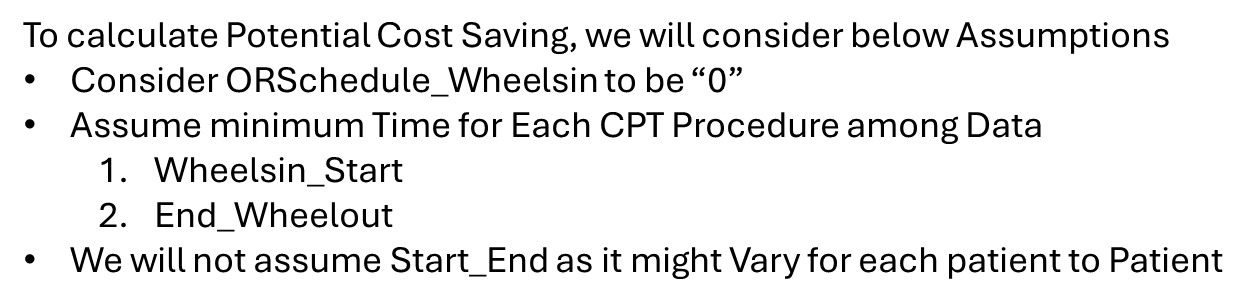

In [341]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'BookingHr', 'ORSchedule_Wheelsin', 'Wheelsin_Start', 'Start_End',
       'End_Wheelsout', 'Wheelsin_Wheelsout', 'ORSchedule_Wheelsout',
       'ORSchedule_Wheelsin Ratio', 'Wheelsin_Start Ratio', 'Start_End Ratio',
       'End_Wheelsout Ratio', 'ORSchedule_Wheelsout Ratio'],
      dtype='object')

In [342]:
A= data.groupby(["Service","CPT Code"]).agg({"Encounter ID":"count",
                                              "ORSchedule_Wheelsin":"mean",
                                              "Wheelsin_Start":["min","mean"],
                                              "Start_End": "mean",
                                              "End_Wheelsout":["min","mean"] }).reset_index()
A.columns = A.columns.map('|'.join).str.strip('|')
A

,Service,CPT Code,Encounter ID|count,ORSchedule_Wheelsin|mean,Wheelsin_Start|min,Wheelsin_Start|mean,Start_End|mean,End_Wheelsout|min,End_Wheelsout|mean
0,ENT,30520,46,17.500000,18.0,21.500000,52.500000,11.0,12.000000
1,ENT,42826,151,33.192053,20.0,23.112583,28.291391,10.0,12.543046
2,General,43775,78,20.500000,18.0,20.000000,96.000000,12.0,13.500000
3,General,47562,39,60.000000,19.0,19.000000,48.000000,13.0,13.000000
4,OBGYN,57460,82,26.000000,25.0,25.000000,33.500000,13.0,13.500000
5,OBGYN,58562,82,18.000000,20.0,21.500000,77.000000,12.0,13.000000
6,Ophthalmology,66982,334,-3.673653,3.0,10.823353,16.302395,3.0,8.745509
7,Orthopedics,26045,21,58.000000,24.0,24.000000,56.000000,10.0,11.904762
8,Orthopedics,26356,20,103.000000,21.0,21.000000,47.000000,19.0,19.000000
9,Orthopedics,26735,21,83.000000,21.0,25.761905,84.000000,17.0,17.000000


In [343]:
A.columns

Index(['Service', 'CPT Code', 'Encounter ID|count', 'ORSchedule_Wheelsin|mean',
       'Wheelsin_Start|min', 'Wheelsin_Start|mean', 'Start_End|mean',
       'End_Wheelsout|min', 'End_Wheelsout|mean'],
      dtype='object')

In [344]:
A["Present"] = A["Encounter ID|count"]*(A["ORSchedule_Wheelsin|mean"]+A["Wheelsin_Start|mean"]+A["Start_End|mean"]+A["End_Wheelsout|mean"])
A["Improved"] = A["Encounter ID|count"]*(A["Wheelsin_Start|min"]+A["Start_End|mean"]+A["End_Wheelsout|min"])

In [345]:
A[['Service', 'CPT Code', 'Encounter ID|count',"Present","Improved"]].head(5)

,Service,CPT Code,Encounter ID|count,Present,Improved
0,ENT,30520,46,4761.0,3749.0
1,ENT,42826,151,14668.0,8802.0
2,General,43775,78,11700.0,9828.0
3,General,47562,39,5460.0,3120.0
4,OBGYN,57460,82,8036.0,5863.0


In [346]:
efficiacy_Impprovement = (A["Present"].sum() - A["Improved"].sum())/A["Present"].sum()
efficiacy_Impprovement*100

35.83645291069552

In [355]:
(A["Present"].sum() / ( 62 * 600 * data["OR Suite"].nunique())) * 100

84.1065188172043

In [357]:
(A["Improved"].sum() / ( 62 * 600 * data["OR Suite"].nunique())) * 100

53.965725806451616

#### Actual Usage in Day

In [347]:
data.columns

Index(['Encounter ID', 'Date', 'OR Suite', 'Service', 'CPT Code',
       'CPT Description', 'Booked Time (min)', 'OR Schedule', 'Wheels In',
       'Start Time', 'End Time', 'Wheels Out', 'Week#', 'Dayofweek',
       'BookingHr', 'ORSchedule_Wheelsin', 'Wheelsin_Start', 'Start_End',
       'End_Wheelsout', 'Wheelsin_Wheelsout', 'ORSchedule_Wheelsout',
       'ORSchedule_Wheelsin Ratio', 'Wheelsin_Start Ratio', 'Start_End Ratio',
       'End_Wheelsout Ratio', 'ORSchedule_Wheelsout Ratio'],
      dtype='object')

In [348]:
# Overall Blocked % for  Utilization Rate w.r.t avaiable time only given Working working Days
(data["ORSchedule_Wheelsout"].sum()/( 62 * 600 * data["OR Suite"].nunique())) * 100

84.1065188172043

In [349]:
# Overall Actual Utilization % w.r.t avaiable time only given Working working Days
(data["Wheelsin_Wheelsout"].sum()/( 62 * 600 * data["OR Suite"].nunique())) * 100

58.16599462365591

In [359]:
#After Improving Operational Efficiecncies w.r.t Each Proceedure
(A["Improved"].sum() / ( 62 * 600 * data["OR Suite"].nunique())) * 100

53.965725806451616

In [360]:
#Further Increasing Working Hrs in a Day
(A["Improved"].sum() / ( (65-3) * 720 * data["OR Suite"].nunique())) * 100

44.97143817204301

In [361]:
#Further Increasing Working Days in a Week
(A["Improved"].sum() / ( (78-3) * 720 * data["OR Suite"].nunique())) * 100

37.17638888888889

In [351]:
# Average Actual Use of OR per day
data.groupby(["Date","OR Suite"])["Wheelsin_Wheelsout"].sum().mean()

348.9959677419355

In [352]:
# Average Actual Blocked time of  OR per day
data.groupby(["Date","OR Suite"])["ORSchedule_Wheelsout"].sum().mean()

504.6391129032258

In [353]:
(504-348)/348

0.4482758620689655